# SC1015 Mini-project on Wine Quality

---

## 1. Problem Definition



As avid wine lovers, we like to sample wines that we have not tried before so that we can discover new wines that match our taste but in doing so, we have sampled so many disappointing wines. Hence, we would like to identify the factors that contribute to wine quality so that winemakers can produce wines that are more likely to satisfy consumer preferences. Thus as consumers, we will be more likely to discover wines that we enjoy and are willing to purchase again in the future.

#### In this project, we will identify which factors are most significant in deciding the quality of red and white wine.

---

## 2. Dataset Preview


In [2]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import IsolationForest

sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('winequalityN.csv')
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

 #### The counts of each variable is not the same as there are some NULL values. 

In [5]:
data.isnull().sum()

def get_missing_data(dataFrame):
    percent_missing = dataFrame.isnull().sum() * 100 / len(dataFrame)
    missing_value_df = pd.DataFrame({'percentage missing': round(percent_missing,3)})
    missing_value_df["percentage missing"] = missing_value_df["percentage missing"].astype(str)
    return missing_value_df

missing_values_df = get_missing_data(data)
print(missing_values_df+'%')

                     percentage missing
type                               0.0%
fixed acidity                    0.154%
volatile acidity                 0.123%
citric acid                      0.046%
residual sugar                   0.031%
chlorides                        0.031%
free sulfur dioxide                0.0%
total sulfur dioxide               0.0%
density                            0.0%
pH                               0.139%
sulphates                        0.062%
alcohol                            0.0%
quality                            0.0%


#### Since the percentage of missing datapoints is extremely low, we proceed to remove all rows of data with missing values.

In [6]:
data = data.dropna()
print(data.count())

type                    6463
fixed acidity           6463
volatile acidity        6463
citric acid             6463
residual sugar          6463
chlorides               6463
free sulfur dioxide     6463
total sulfur dioxide    6463
density                 6463
pH                      6463
sulphates               6463
alcohol                 6463
quality                 6463
dtype: int64


#### We are left with 6463 rows of data in **`df_wine`**

In [7]:
wine_red = data[data["type"] == "red"].copy()
wine_white = data[data["type"] == "white"].copy()

In [8]:
red_wine_stats = pd.DataFrame({"Red Wine Stats" : wine_red.describe().loc["mean"]})
white_wine_stats = pd.DataFrame({"White Wine Stats" : wine_white.describe().loc["mean"]})
wine_stats = red_wine_stats.merge(white_wine_stats, on = red_wine_stats.index)
wine_stats

key_0  Red Wine Stats  White Wine Stats
0          fixed acidity        8.326365          6.855123
1       volatile acidity        0.527659          0.278071
2            citric acid        0.271551          0.334199
3         residual sugar        2.538512          6.394343
4              chlorides        0.087497          0.045771
5    free sulfur dioxide       15.841808         35.317146
6   total sulfur dioxide       46.463905        138.340144
7                density        0.996752          0.994026
8                     pH        3.310590          3.188154
9              sulphates        0.657866          0.489700
10               alcohol       10.419617         10.516772
11               quality        5.636535          5.878029

#### Comparing the statistical distribution of red wine and white wine, we see that there is a marked difference for some of the independent variables.

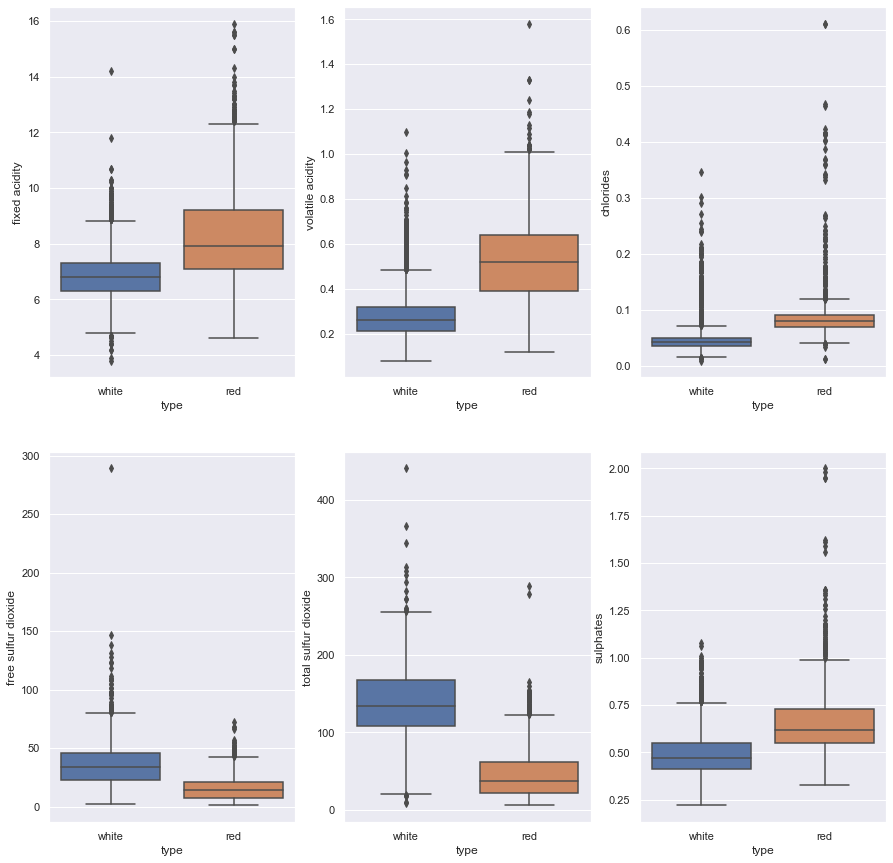

In [9]:
features = ['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']
fig, axes = plt.subplots(2, 3, figsize=(15,15))
for i, ax in enumerate(axes.flat):
    sb.boxplot(data = data, y = features[i], x = 'type', ax = ax)

#### Since the distributions vary quite a lot between red and white wines for quite a few of the features, we decided to visualise the trends in red and white wine individually.

In [10]:
wine_white

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0              0.27         0.36            20.7   
1     white            6.3              0.30         0.34             1.6   
2     white            8.1              0.28         0.40             6.9   
3     white            7.2              0.23         0.32             8.5   
4     white            7.2              0.23         0.32             8.5   
...     ...            ...               ...          ...             ...   
4891  white            5.7              0.21         0.32             0.9   
4893  white            6.2              0.21         0.29             1.6   
4894  white            6.6              0.32         0.36             8.0   
4896  white            5.5              0.29         0.30             1.1   
4897  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
4891      0.038                 38.0                 121.0  0.99074  3.24   
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
4891       0.46     10.6        6  
4893       0.50     11.2        6  
4894       0.46      9.6        5  
4896       0.38     12.8        7  
4897       0.32     11.8        6  

[4870 rows x 13 columns]

#### After splitting the data based on the types of wine, white wine has 4870 rows of data

In [11]:
wine_red

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4898  red            7.4             0.700         0.00             1.9   
4899  red            7.8             0.880         0.00             2.6   
4900  red            7.8             0.760         0.04             2.3   
4901  red           11.2             0.280         0.56             1.9   
4902  red            7.4             0.700         0.00             1.9   
...   ...            ...               ...          ...             ...   
6491  red            6.8             0.620         0.08             1.9   
6492  red            6.2             0.600         0.08             2.0   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4898      0.076                 11.0                  34.0  0.99780  3.51   
4899      0.098                 25.0                  67.0  0.99680  3.20   
4900      0.092                 15.0                  54.0  0.99700  3.26   
4901      0.075                 17.0                  60.0  0.99800  3.16   
4902      0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
4898       0.56      9.4        5  
4899       0.68      9.8        5  
4900       0.65      9.8        5  
4901       0.58      9.8        6  
4902       0.56      9.4        5  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[1593 rows x 13 columns]

#### On the other hand, red wine has 1593 rows of data

<AxesSubplot:xlabel='type', ylabel='count'>

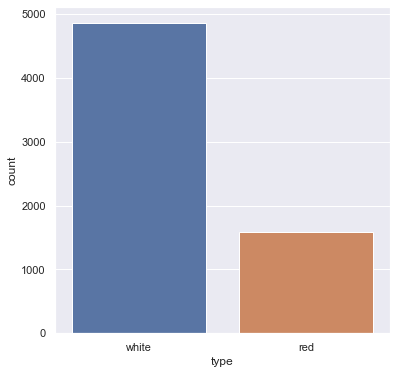

In [12]:
sb.set(rc={'figure.figsize':(6,6)})
sb.countplot(data = data, x = 'type')

#### We see that the dataset is imbalanced as the proportion of white wine datapoints in the dataset is much greater than that of red wine. 
#### This does not present too big a challenge in our analysis but we have to keep in mind that the data for red wine only constitutes about 20% of the total dataset.

# 3. Data Visualisation

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


#### The data types of all the independent variables have Dtype **`float64`** while quality has Dtype **`int64`**

In [14]:
wine_red = data[data["type"] == "red"].copy()
wine_white = data[data["type"] == "white"].copy()

red_wine_stats = pd.DataFrame({"Red Wine Stats" : wine_red.describe().loc["mean"]})

In [15]:
white_wine_stats = pd.DataFrame({"White Wine Stats" : wine_white.describe().loc["mean"]})
red_wine_stats = red_wine_stats.merge(white_wine_stats, on = red_wine_stats.index)

In [16]:
red_wine_stats['Percentage Change'] = ((red_wine_stats[['Red Wine Stats', 'White Wine Stats']].pct_change(axis=1)['White Wine Stats'])* 100).round(2).map(str) + '%'
red_wine_stats

key_0  Red Wine Stats  White Wine Stats Percentage Change
0          fixed acidity        8.326365          6.855123           -17.67%
1       volatile acidity        0.527659          0.278071            -47.3%
2            citric acid        0.271551          0.334199            23.07%
3         residual sugar        2.538512          6.394343           151.89%
4              chlorides        0.087497          0.045771           -47.69%
5    free sulfur dioxide       15.841808         35.317146           122.94%
6   total sulfur dioxide       46.463905        138.340144           197.74%
7                density        0.996752          0.994026            -0.27%
8                     pH        3.310590          3.188154             -3.7%
9              sulphates        0.657866          0.489700           -25.56%
10               alcohol       10.419617         10.516772             0.93%
11               quality        5.636535          5.878029             4.28%

#### Comparing between the statistics for red wine and white wine, we see that white wine has significantly lower levels of **`volatile acidity`**, **`chlorides`** and **`sulphates`**, while it has significantly **`higher residual sugar`**, **`free sulfur dioxide`** and **`total sulfur dioxide`**.

---

#### Lets try to find out which properties of the wine affect the quality more significantly. We do this through 2 correlation matrices, one for each type of wine. First, we start with white wine.

<AxesSubplot:>

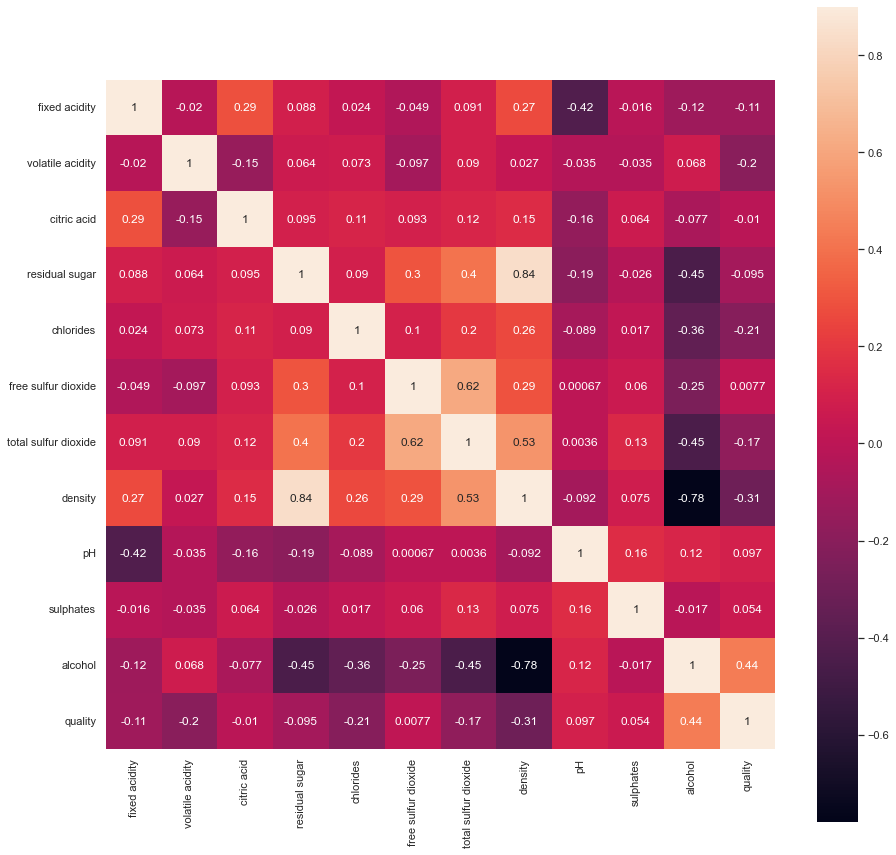

In [17]:
corMat = wine_white.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(corMat, vmax=0.9, square = True, annot=True, ax = ax)

#### For white wine, **`density`** and **`level of chlorides`** has the strongest negative correlation with **`quality`**, whereas **`alcohol`** is the only property with strong positive correlation with **`quality`**.

<AxesSubplot:>

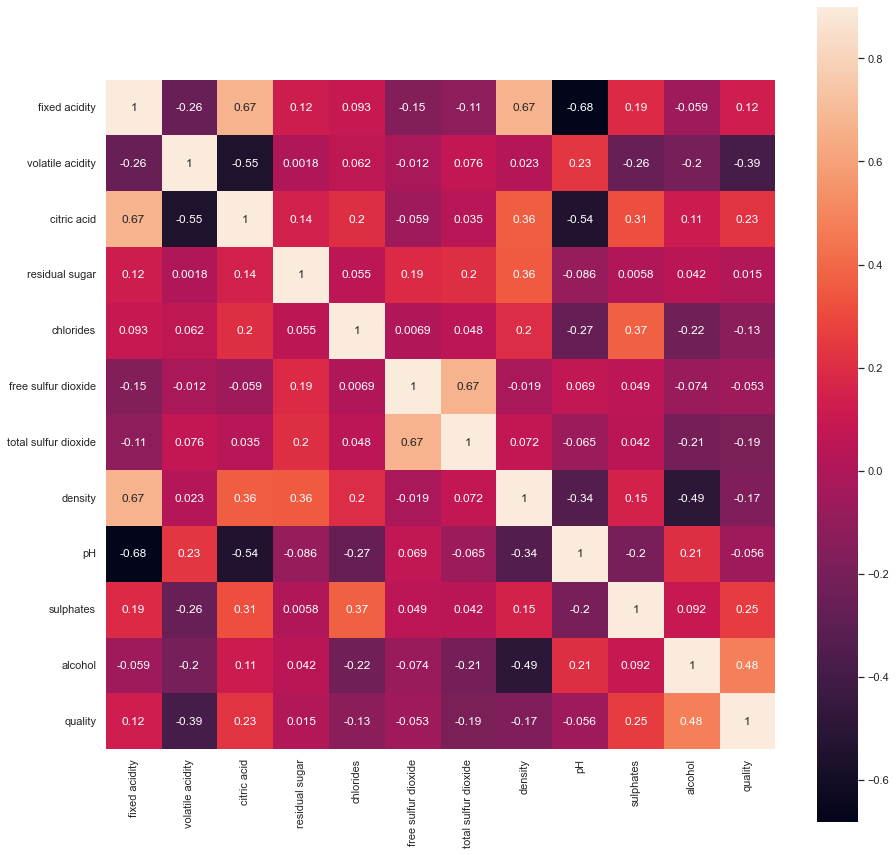

In [18]:
corMat = wine_red.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(corMat, vmax=0.9, square = True, annot=True, ax = ax)

#### For red wine, **`volatile acidity`** and **`total sulfur dioxide`** has the strongest negative correlation with **`quality`**, while **`alcohol`** and **`sulphates`** have the strongest positive correlation with **`quality`**.

---

#### Next, we look at how the data for the properties of each type of wine is distributed and also find out their level skewness. We first make the data colours match the colour of the wines.

In [19]:
colours = ["#d4c52d", "#bf081d"]
sb.set_palette(sb.color_palette(colours))

Feature fixed acidity has skewness 1.7212484596391935
Feature volatile acidity has skewness 1.4996923011284304
Feature citric acid has skewness 0.474797263853263
Feature residual sugar has skewness 1.4367920381024464
Feature chlorides has skewness 5.402178230133038
Feature free sulfur dioxide has skewness 1.2231427901435266
Feature total sulfur dioxide has skewness -0.0004253507574189384
Feature density has skewness 0.5040873015560973
Feature pH has skewness 0.3910028911087453
Feature sulphates has skewness 1.8025225506748195
Feature alcohol has skewness 0.5653039979634944
Feature quality has skewness 0.18983372101650287


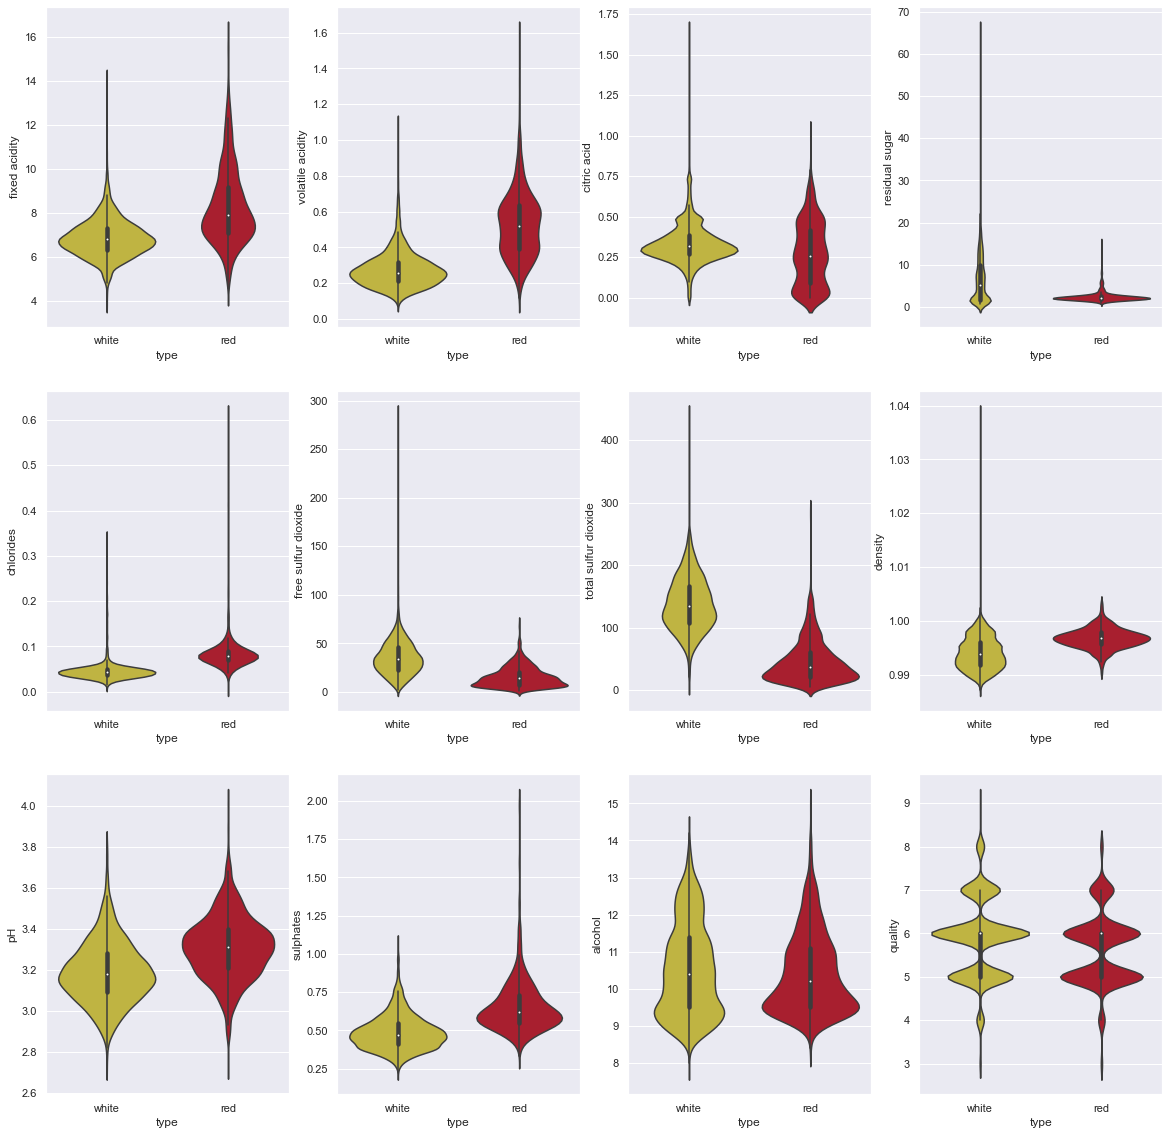

In [20]:
from scipy.stats import skew

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(20,20))

for i, ax in enumerate(axes.flat):
    sb.violinplot(data = data, y = features[i], x = 'type', ax = ax)
    

    sk = skew(data[features[i]])

    print("Feature {} has skewness {}".format(features[i], sk))

#### Next, we check how the quality of wine is distributed.

<AxesSubplot:xlabel='quality', ylabel='count'>

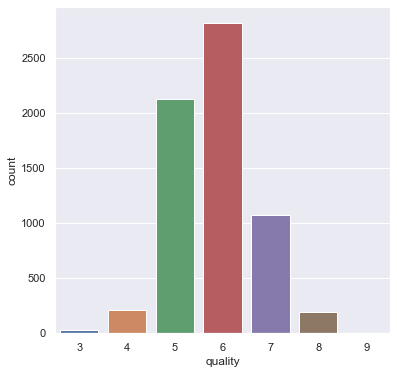

In [21]:
sb.set(rc={'figure.figsize':(6,6)})
sb.countplot(data = data, x = 'quality')

#### Based on the distribution above, we group qualities 3, 4 and 5 together as **`Low`**, quality 6 as **`Medium`** and qualities 7, 8 and 9 as **`High`**, so that the counts are roughly similar. We append a new column in our dataframe for subsequent use.

In [22]:
data['Quality Level'] = pd.cut(data['quality'], bins=[0, 5, 6, 9], labels=['Low', 'Medium', 'High'])

In [23]:
data.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality Quality Level  
0       0.45      8.8        6        Medium  
1       0.49      9.5        6        Medium  
2       0.44     10.1        6        Medium  
3       0.40      9.9        6        Medium  
4       0.40      9.9        6        Medium

<AxesSubplot:xlabel='Quality Level', ylabel='count'>

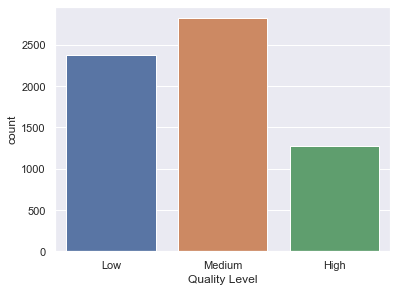

In [24]:
sb.set(rc={'figure.figsize':(6,4.5)})
sb.countplot(data = data, x = 'Quality Level')

---
#### Next, we shall perform visualisation on the independent variables.

### Alcohol level and wine quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

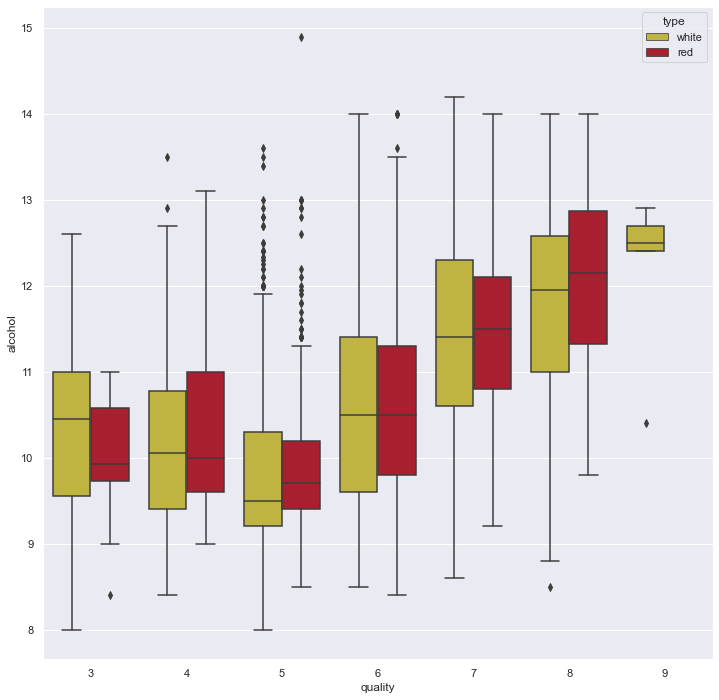

In [25]:
fig, ax = plt.subplots(figsize=(12,12))  

colours = ["#d4c52d", "#bf081d"]
sb.set_palette(sb.color_palette(colours))

sb.boxplot(data = data, x = "quality", y = "alcohol" , hue = "type", ax = ax)

#### Since there is a clear trend amongst each quality level, we use the discrete quality levels as a basis of comparison. Here, we observe that alcohol content of wine dips from quality 3 to 5 and rises sharply from quality 5 to 9.

 
### Fixed acidity and pH

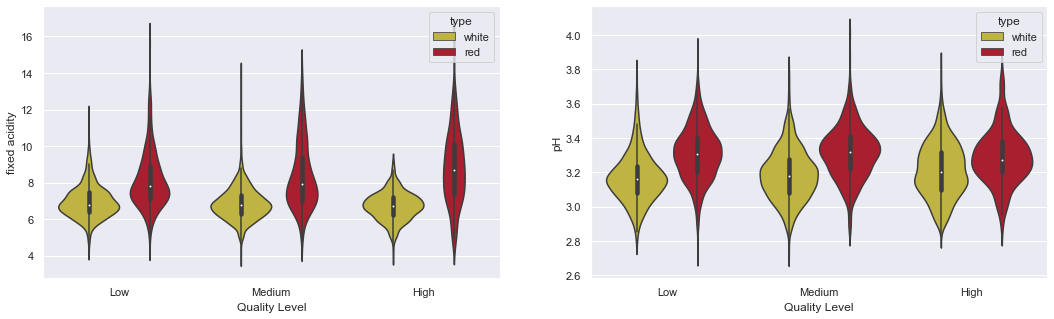

In [26]:
features_violin = ['fixed acidity', 'pH']
fig_2, axes_2 = plt.subplots(1, 2, figsize=(18,5))

for i, ax in enumerate(axes_2.flat):

    sb.violinplot(data = data, y = features_violin[i], x = 'Quality Level',hue = 'type', ax = ax)

#### Grapes are the main contributor to the level of fixed acidity. Cool climate grapes give high acidity and results in a more sour taste and warm climate grapes give less acidity.

#### For both types of wine and across the wine quality bins, the fixed acidity is spread out around a value of 7 to 8.  The pH also does not vary much across different wine quality.

### Volatile acidity and Citric acid

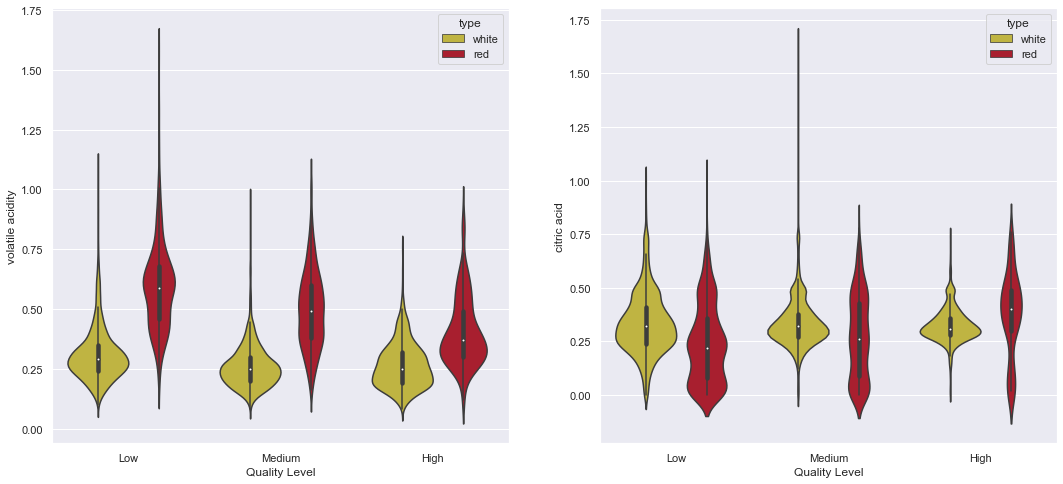

In [27]:
features_violin = ['volatile acidity', 'citric acid']
fig_2, axes_2 = plt.subplots(1, 2, figsize=(18,8))


for i, ax in enumerate(axes_2.flat):

    sb.violinplot(data = data, y = features_violin[i], x = 'Quality Level',hue = 'type', ax = ax)

#### Volatile acidity is distilled out from the wine as too much of it can lead to undesirable taste hence we can see more of its presence in lower quality wine. For white wine the change in quality is negligible.

#### Citric acid is added separately to give the wine more freshness, we can see the effect of higher citric acid on red wine leading to better quality. Again, for white wine the change in quality is negligible.

### Residual sugar and quality

<AxesSubplot:xlabel='Quality Level', ylabel='residual sugar'>

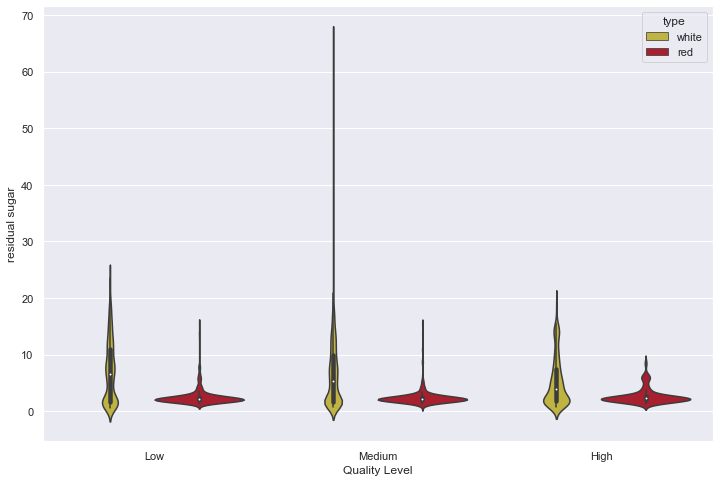

In [28]:
fig_2, axes_2 = plt.subplots(1, 1, figsize=(12,8))


sb.violinplot(data = data, y = 'residual sugar', x = 'Quality Level',hue = 'type')

#### Here, we see that residual sugar does not have an apparant effect on the overall wine quality.

### Density

<AxesSubplot:xlabel='alcohol', ylabel='density'>

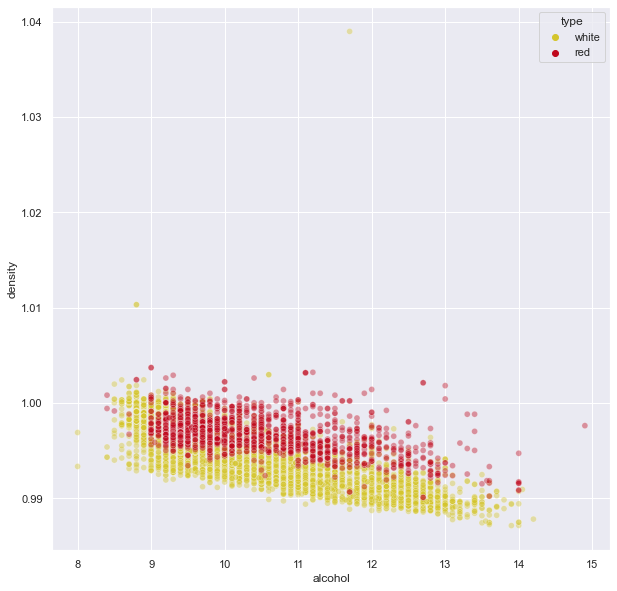

In [29]:
plt.figure(figsize=(10, 10))
sb.scatterplot(data = data, x = "alcohol", y = "density", hue = "type", alpha=0.4)

#### We can see from above that the correlation with density and alcohol is similar for both types of wine, with the obvious difference that red wine has higher density compared to white wine.

<AxesSubplot:xlabel='Quality Level', ylabel='free sulfur dioxide'>

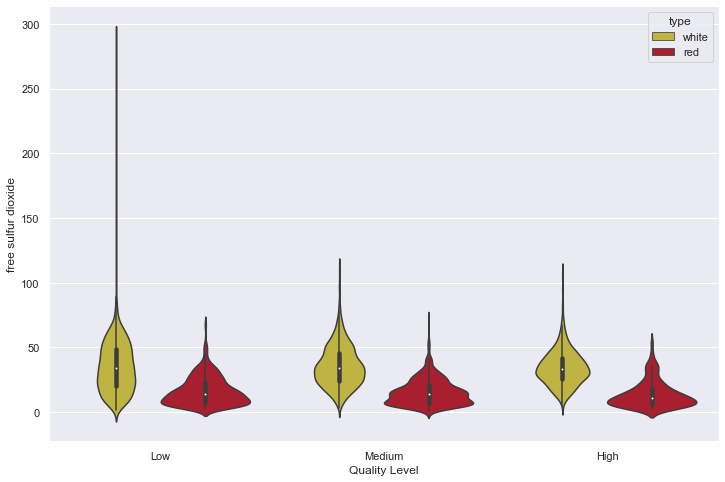

In [34]:
fig_2, axes_2 = plt.subplots(1, 1, figsize=(12,8))


sb.violinplot(data = data, y = 'free sulfur dioxide', x = 'Quality Level',hue = 'type')

#### Sulphur dioxide kills bacteria, but excessive sulphur dioxide can kill the good yeast and produce an undesirable odour, so the least amount of sulphur dioxide without making the wine pungent will give us a good wine. We can observe that sulfur dioxide plays a bigger role for white wine rather than red.

---

# 4. Data Cleaning

#### Before we do data cleaning, we try to run decision tree first.

In [33]:

wine_white['Quality Level'] = pd.cut(wine_white['quality'], bins=[0, 5, 6, 9], labels=['Low', 'Medium', 'High'])
wine_white.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality Quality Level  
0       0.45      8.8        6        Medium  
1       0.49      9.5        6        Medium  
2       0.44     10.1        6        Medium  
3       0.40      9.9        6        Medium  
4       0.40      9.9        6        Medium

In [34]:
wine_red['Quality Level'] = pd.cut(wine_red['quality'], bins=[0, 5, 6, 9], labels=['Low', 'Medium', 'High'])
wine_red.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4898  red            7.4              0.70         0.00             1.9   
4899  red            7.8              0.88         0.00             2.6   
4900  red            7.8              0.76         0.04             2.3   
4901  red           11.2              0.28         0.56             1.9   
4902  red            7.4              0.70         0.00             1.9   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4898      0.076                 11.0                  34.0   0.9978  3.51   
4899      0.098                 25.0                  67.0   0.9968  3.20   
4900      0.092                 15.0                  54.0   0.9970  3.26   
4901      0.075                 17.0                  60.0   0.9980  3.16   
4902      0.076                 11.0                  34.0   0.9978  3.51   

      sulphates  alcohol  quality Quality Level  
4898       0.56      9.4        5           Low  
4899       0.68      9.8        5           Low  
4900       0.65      9.8        5           Low  
4901       0.58      9.8        6        Medium  
4902       0.56      9.4        5           Low

#### Here we separate the different wines into low, medium and high quality levels based on their quality scores to allow our model to easier identify high quality wines.

In [35]:

categoryDataWhite = wine_white;
categoryDataWhite['Quality Level'].replace(['Low', 'Medium','High'],[0, 1, 2], inplace=True)
categoryDataWhite.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality Quality Level  
0       0.45      8.8        6             1  
1       0.49      9.5        6             1  
2       0.44     10.1        6             1  
3       0.40      9.9        6             1  
4       0.40      9.9        6             1

In [36]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]
y = pd.DataFrame(categoryDataWhite['Quality Level'])
X = pd.DataFrame(categoryDataWhite[predictors]) 


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5714676889375685

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5640394088669951



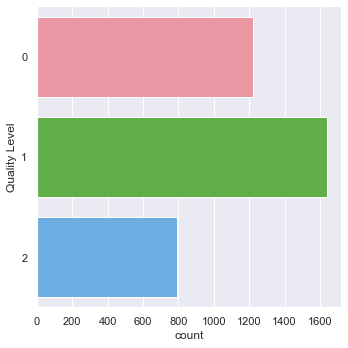

In [37]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y,random_state = 70)

# Draw the distribution of Response
sb.catplot(y = "Quality Level", data = y_train, kind = "count")

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()



#### As red and white wines have drastically different distributions, we used an Isolation Forest to get rid of the outliers of red wine and white wine individually.
#### To create a metric to judge the effect of removing outliers has on our analysis, we used a decision tree model of depth 4 to get the classification accuracy of the model on the unclean data. (0.564 on test dataset)

In [38]:

rng = np.random.RandomState(42)
model = IsolationForest(contamination=float(0.1),random_state=42)

anomaly_inputs = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH', 'sulphates','alcohol']
model.fit(wine_white[anomaly_inputs].values)

IsolationForest(contamination=0.1, random_state=42)

#### The features are fed into the isolation forest model, where anomaly scores are assigned to each of the datapoints, and from there a value of -1 or 1 is given to the data points based on the contamination level, which we set to 0.1.

In [39]:
print(model.get_params())

wine_white['anomaly_scores'] = model.decision_function(wine_white[anomaly_inputs].values)
wine_white['anomaly'] = model.predict(wine_white[anomaly_inputs].values)

{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [40]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sb.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sb.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return 

Outlier Method: Isolation Forest
Number of anomalous values 486
Number of non anomalous values  4384
Total Number of Values: 4870


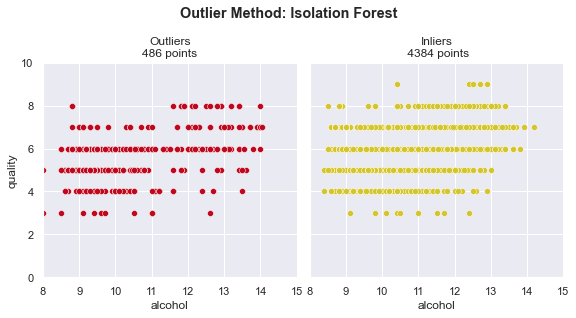

In [41]:
outlier_plot(wine_white, 'Isolation Forest', 'alcohol', 'quality', [8, 15], [0, 10]);

#### The left plot shows the outliers removed from white wine dataframe. The right plot shows the data points that will be used for subsequent analysis.

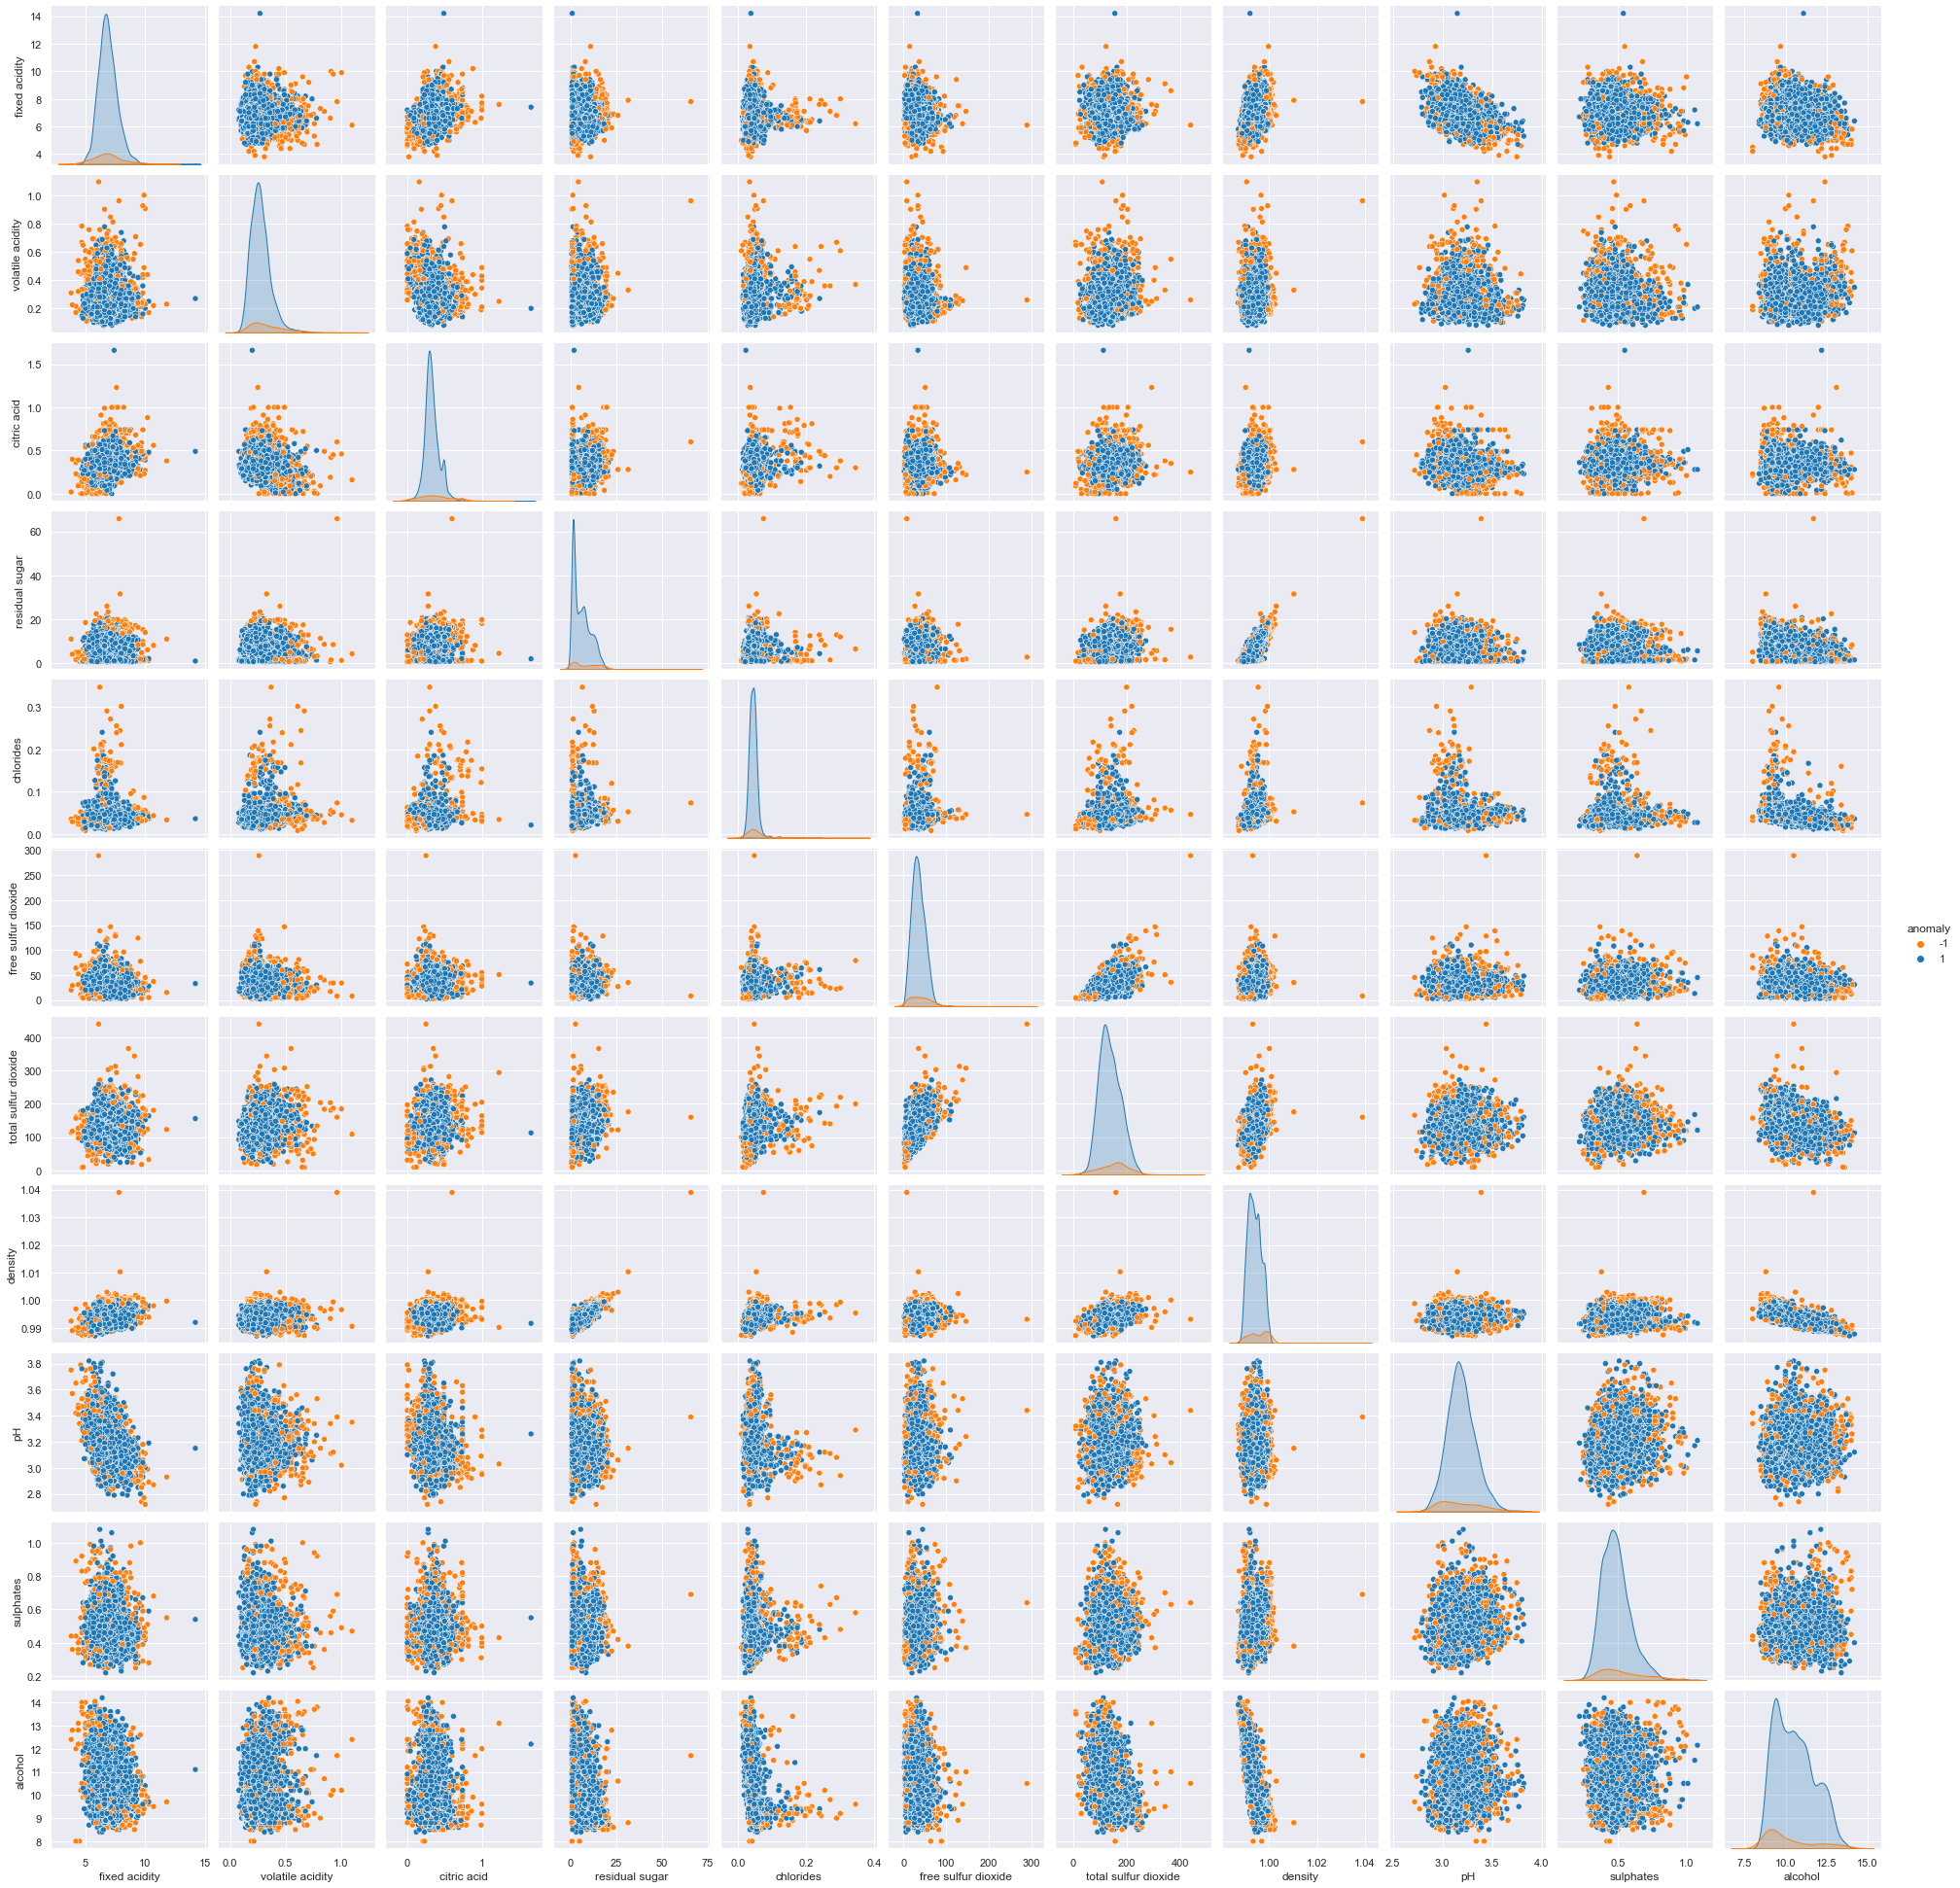

In [42]:
palette = ['#ff7f0e', '#1f77b4']
sb.pairplot(wine_white, vars=anomaly_inputs, hue='anomaly', palette=palette)

#### These graphs show how the outliers of white wine are identified for each variable with respect to another variable. The orange points are the identified outliers.

{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Outlier Method: Isolation Forest
Number of anomalous values 160
Number of non anomalous values  1433
Total Number of Values: 1593


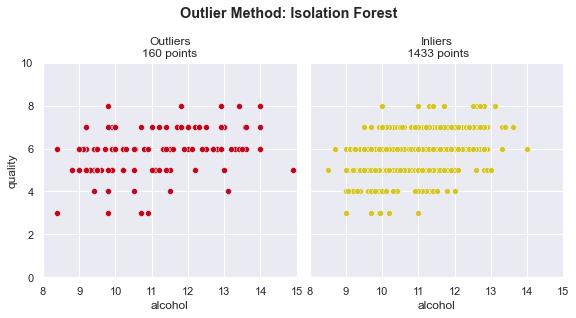

In [43]:
model.fit(wine_red[anomaly_inputs].values)
print(model.get_params())

wine_red['anomaly_scores'] = model.decision_function(wine_red[anomaly_inputs].values)
wine_red['anomaly'] = model.predict(wine_red[anomaly_inputs].values)
outlier_plot(wine_red, 'Isolation Forest', 'alcohol', 'quality', [8, 15], [0, 10]);

#### The left plot shows the outliers removed from red wine dataframe. The right plot shows the datapoints that will be used for subsequent analysis.

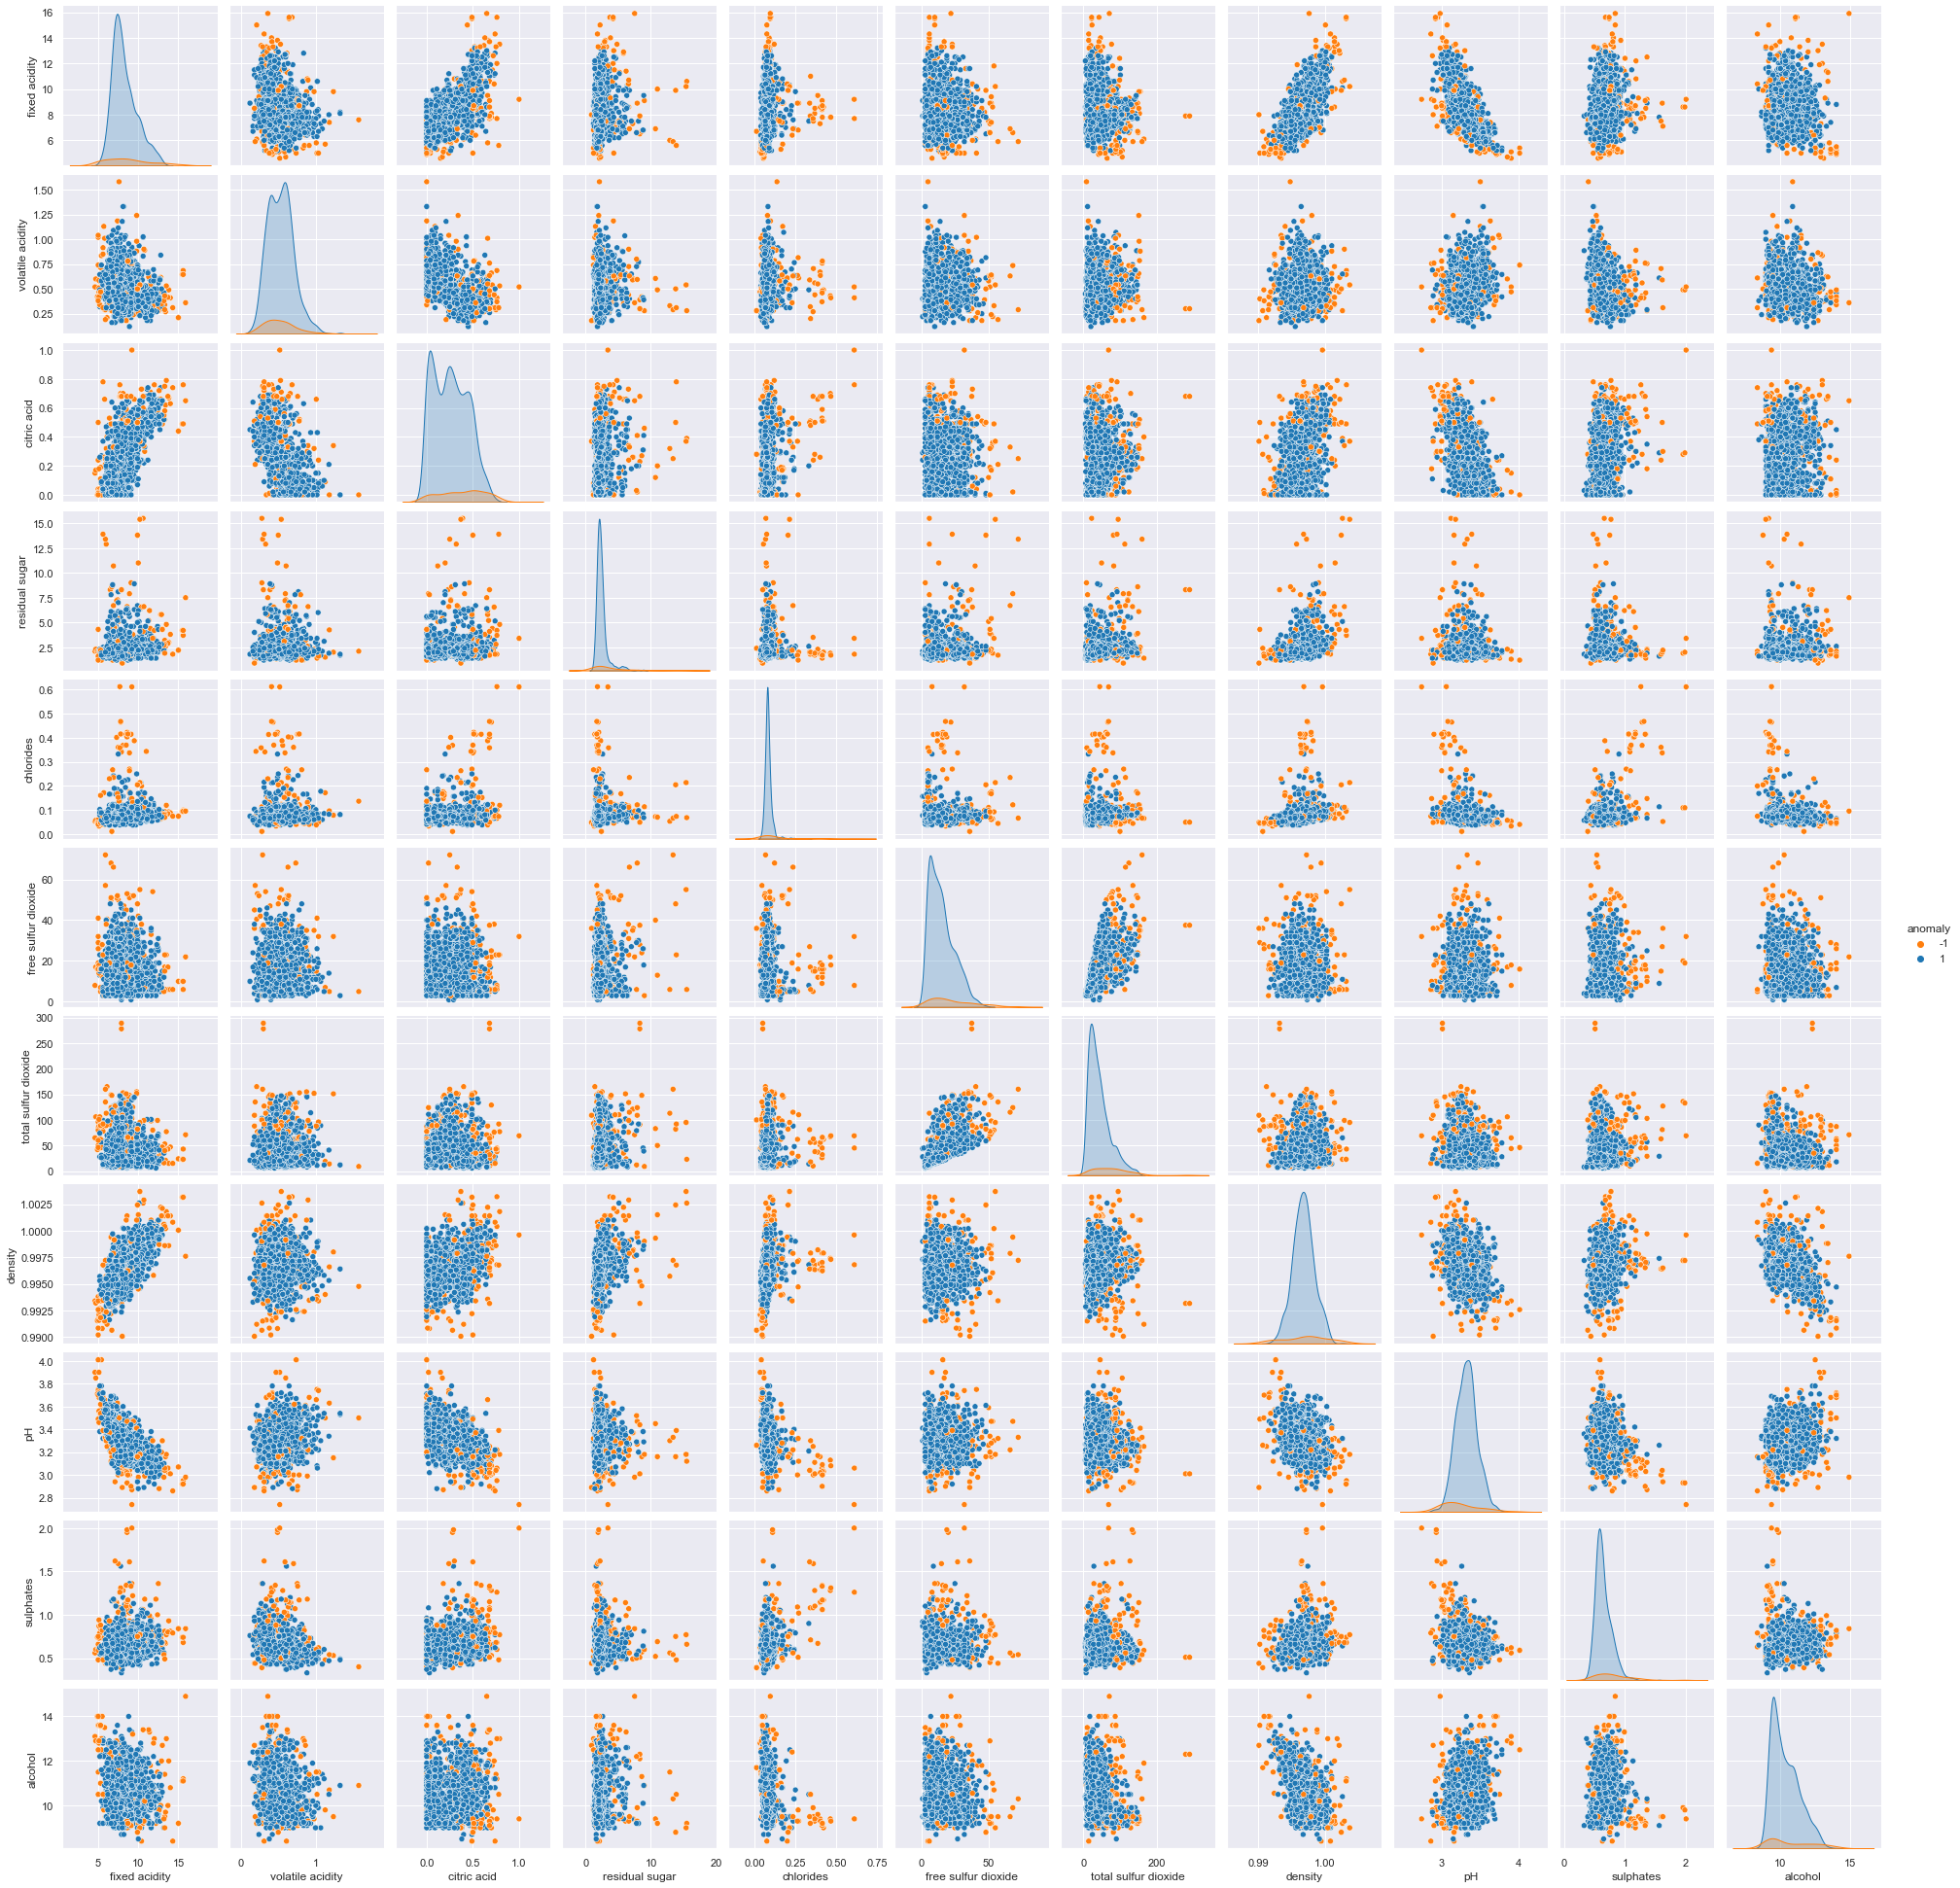

In [44]:
sb.pairplot(wine_red, vars=anomaly_inputs, hue='anomaly', palette=palette)

#### These graphs show how the outliers of red wine are identified for each variable with respect to another variable. The orange points are the identified outliers.

In [45]:
wine_white_cleaned = wine_white[wine_white["anomaly"] == 1]

In [46]:
wine_red_cleaned = wine_red[wine_red["anomaly"] == 1]

#### Outliers, identified by having an anomaly value of -1, are dropped from the dataset.

In [47]:
wine_white_cleaned = wine_white_cleaned.drop(columns = ["anomaly_scores", "anomaly"])
wine_red_cleaned = wine_red_cleaned.drop(columns = ["anomaly_scores", "anomaly"])

In [48]:
wine_white_cleaned.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   

   sulphates  alcohol  quality Quality Level  
1       0.49      9.5        6             1  
2       0.44     10.1        6             1  
3       0.40      9.9        6             1  
4       0.40      9.9        6             1  
5       0.44     10.1        6             1

In [49]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]
y = pd.DataFrame(wine_white_cleaned['Quality Level'])
X = pd.DataFrame(wine_white_cleaned[predictors]) 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5945863746958637

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5711678832116789



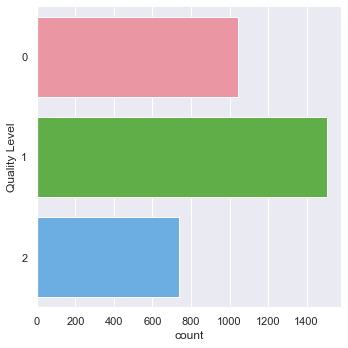

In [54]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y,random_state = 60)

# Draw the distribution of Response
sb.catplot(y = "Quality Level", data = y_train, kind = "count")

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

#### Putting the cleaned data through the same decision tree model of depth 4, we find that we now have a higher classification accuracy for both the train and test dataset (0.571), showing that we are able to improve our model by removing outliers.

# 5. Machine Learning Models

Since white and red wine quality are effected by the physicochemical factors differently, we apply machine learning model seperately for red and white wine.

### 5.1 Decision Tree and Grid Search 

#### Grid search is a hyperparameter optimization technique commonly used in machine learning to find the best combination of hyperparameters for a given model. The machine learning model we are using is decision tree. 

#### --White--

In [55]:
# Extract Response and Predictors
predictors = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]
y = pd.DataFrame(wine_white_cleaned['Quality Level'])
X = pd.DataFrame(wine_white_cleaned[predictors]) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y,random_state = 60)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 11}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.676094890510949
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5748175182481752



[Text(0.4421768707482993, 0.9444444444444444, 'alcohol <= 10.625\ngini = 0.639\nsamples = 3288\nvalue = [1046, 1505, 737]'),
 Text(0.1875, 0.8333333333333334, 'volatile acidity <= 0.237\ngini = 0.581\nsamples = 1885\nvalue = [854, 854, 177]'),
 Text(0.061224489795918366, 0.7222222222222222, 'alcohol <= 8.75\ngini = 0.58\nsamples = 704\nvalue = [174, 402, 128]'),
 Text(0.05442176870748299, 0.6111111111111112, 'gini = 0.322\nsamples = 21\nvalue = [1, 3, 17]'),
 Text(0.06802721088435375, 0.6111111111111112, 'free sulfur dioxide <= 11.5\ngini = 0.568\nsamples = 683\nvalue = [173, 399, 111]'),
 Text(0.061224489795918366, 0.5, 'gini = 0.472\nsamples = 21\nvalue = [14, 6, 1]'),
 Text(0.07482993197278912, 0.5, 'alcohol <= 9.15\ngini = 0.562\nsamples = 662\nvalue = [159, 393, 110]'),
 Text(0.03741496598639456, 0.3888888888888889, 'fixed acidity <= 6.75\ngini = 0.634\nsamples = 119\nvalue = [26, 56, 37]'),
 Text(0.02040816326530612, 0.2777777777777778, 'pH <= 3.25\ngini = 0.39\nsamples = 49\nval

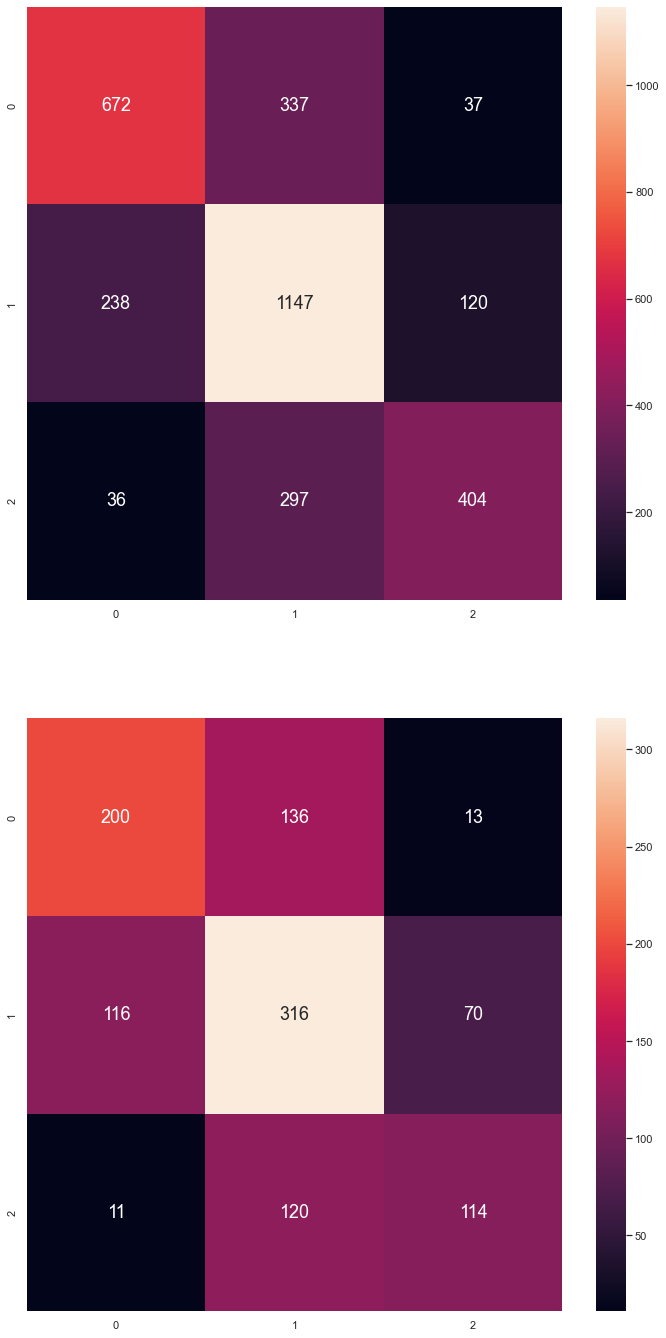

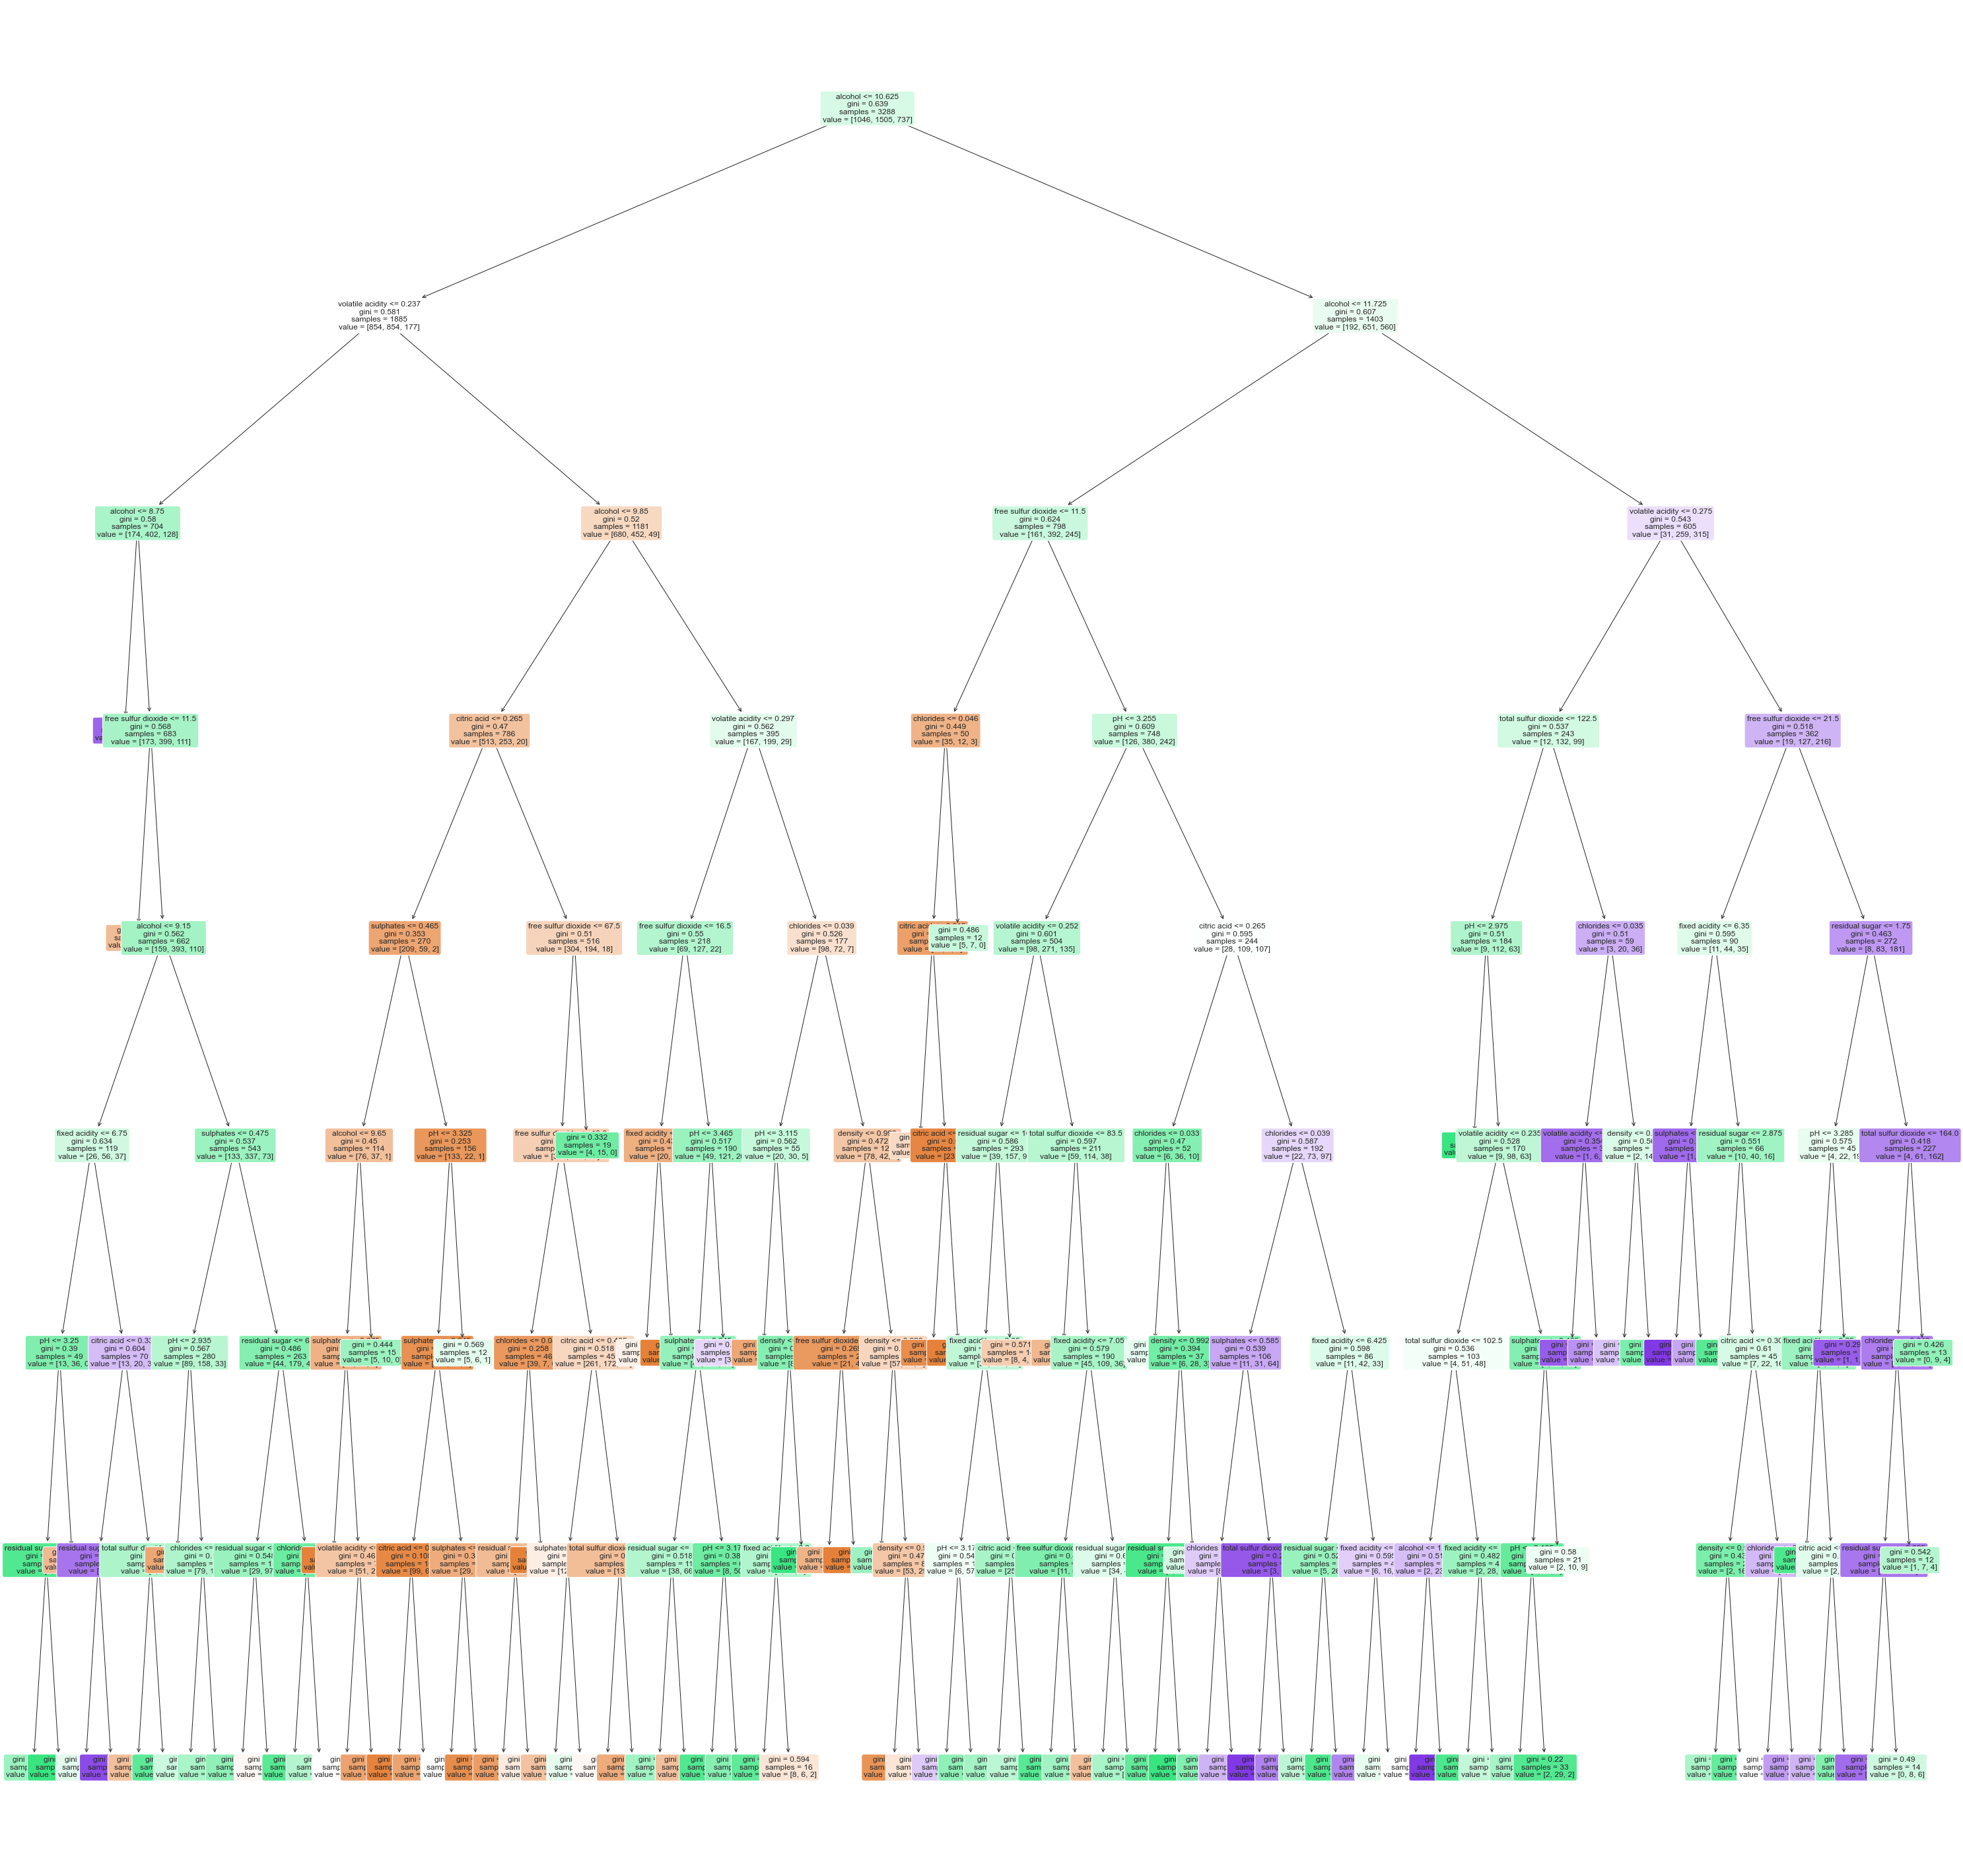

In [56]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

# Define the hyperparameters to tune using a parameter grid
param_grid = {
    'max_depth': range(2,12),
    'min_samples_leaf': range(5,20),
    'criterion': ['gini', 'entropy']
}

# Define the decision tree classifier
tree = DecisionTreeClassifier()

# Define the grid search using 5-fold cross-validation
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5,scoring = 'accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters: ', grid_search.best_params_)

# Use the best hyperparameters to train a new decision tree model
best_tree = DecisionTreeClassifier(**grid_search.best_params_)
best_tree.fit(X_train, y_train)

# Predict on the training and test sets using the best model
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", best_tree.score(X_train, y_train))
#print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", best_tree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
from sklearn.tree import plot_tree
f = plt.figure(figsize=(52,52))
plot_tree(best_tree, 
          filled=True, 
          rounded=True,
          feature_names= X_test.columns,
          fontsize = 12)

We can see that the best hyperparameters 'creterion':'gini', 'max_depth':'8', 'min_samples_leaf': 11'

The accuracy of train dataset is 0.6761. The accuracy of test dataset is 0.5748.

The important features for predicting white wine quality are `alcohol`,`volatile acidity`,`free sulfur dioxide` and `chlorides`, since they are close to the root node adn appears multiples times in the first few level of the tree.

#### --red--

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7}
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7392923649906891
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6100278551532033



[Text(0.5028409090909091, 0.9285714285714286, 'alcohol <= 10.35\nentropy = 1.418\nsamples = 1074\nvalue = [136, 503, 435]'),
 Text(0.2528409090909091, 0.7857142857142857, 'sulphates <= 0.625\nentropy = 1.069\nsamples = 591\nvalue = [17, 389, 185]'),
 Text(0.13636363636363635, 0.6428571428571429, 'total sulfur dioxide <= 98.5\nentropy = 0.872\nsamples = 386\nvalue = [3, 287, 96]'),
 Text(0.09090909090909091, 0.5, 'sulphates <= 0.525\nentropy = 0.924\nsamples = 333\nvalue = [3, 237, 93]'),
 Text(0.045454545454545456, 0.35714285714285715, 'citric acid <= 0.055\nentropy = 0.644\nsamples = 111\nvalue = [1, 95, 15]'),
 Text(0.022727272727272728, 0.21428571428571427, 'chlorides <= 0.073\nentropy = 0.216\nsamples = 29\nvalue = [1, 28, 0]'),
 Text(0.011363636363636364, 0.07142857142857142, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(0.03409090909090909, 0.07142857142857142, 'entropy = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.06818181818181818, 0.21428571428571427, 'alcohol

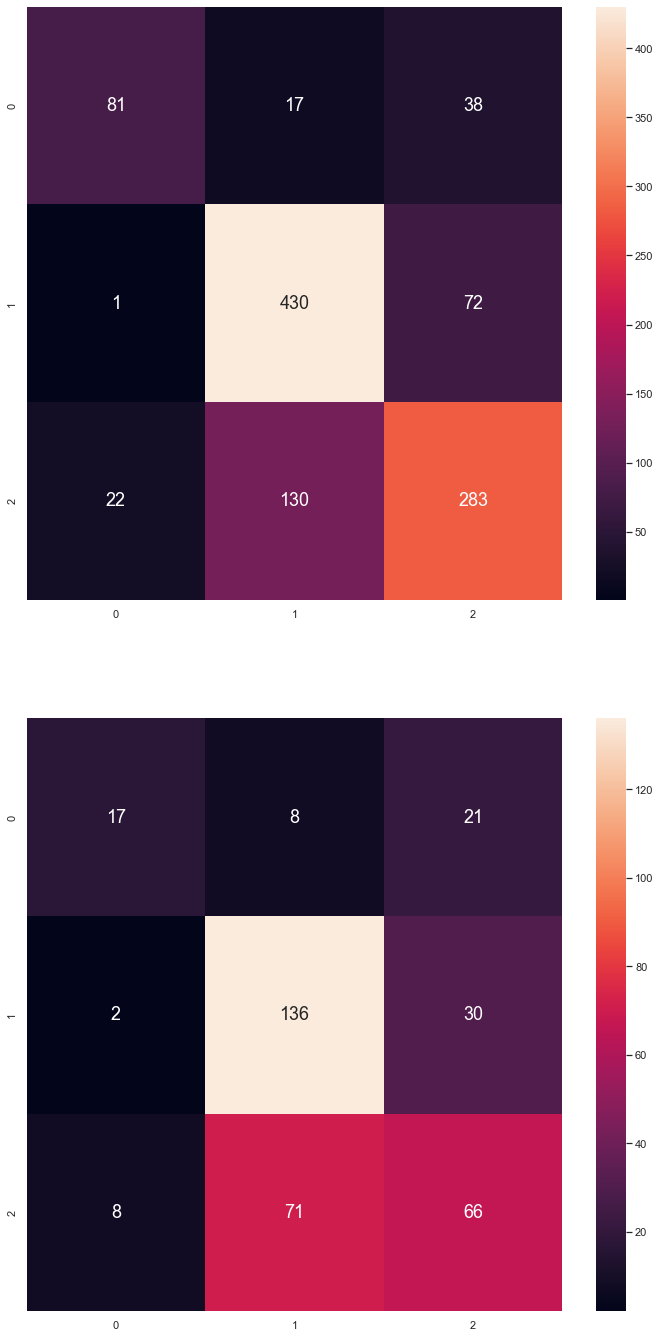

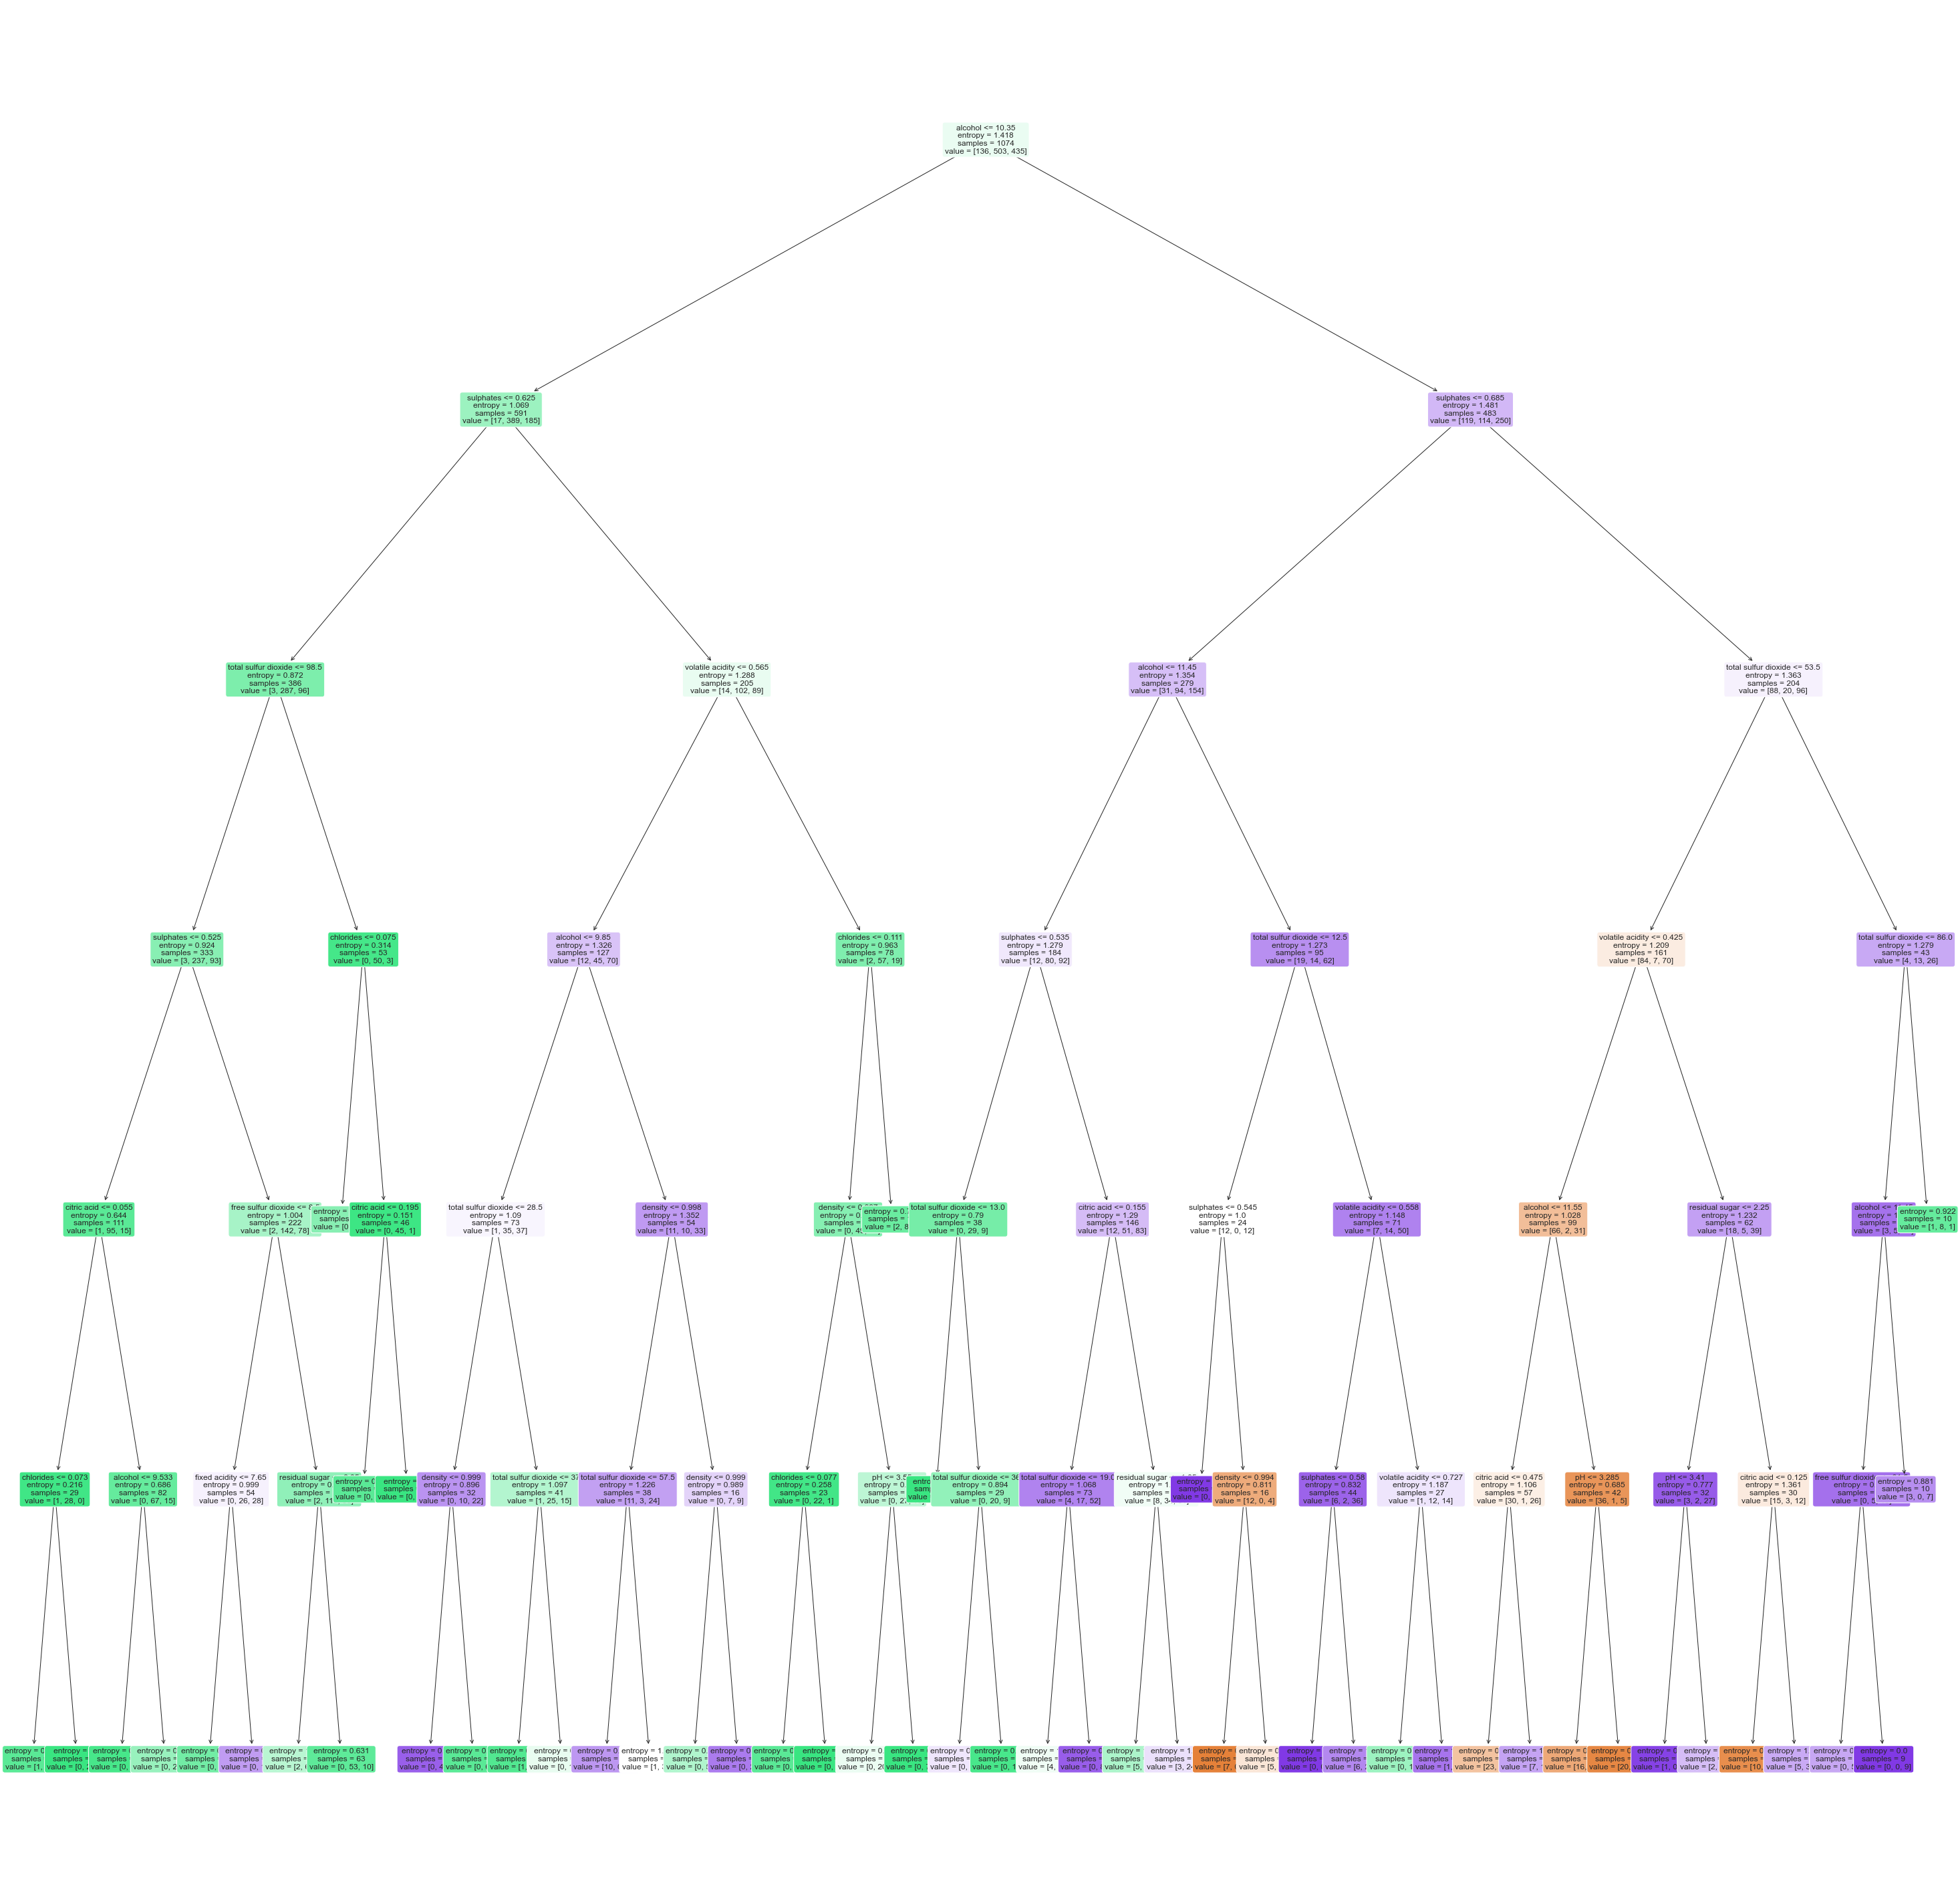

In [59]:
y = pd.DataFrame(wine_red_cleaned['Quality Level'])
X = pd.DataFrame(wine_red_cleaned[predictors]) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y,random_state = 60)
# Define the hyperparameters to tune using a parameter grid
param_grid = {
    'max_depth': range(2,12),
    'min_samples_leaf': range(5,20),
    'criterion': ['gini', 'entropy']
}

# Define the decision tree classifier
tree = DecisionTreeClassifier()

# Define the grid search using 5-fold cross-validation
grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5,scoring = 'accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
print('Best hyperparameters: ', grid_search.best_params_)

# Use the best hyperparameters to train a new decision tree model
best_tree = DecisionTreeClassifier(**grid_search.best_params_)
best_tree.fit(X_train, y_train)

# Predict on the training and test sets using the best model
y_train_pred = best_tree.predict(X_train)
y_test_pred = best_tree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", best_tree.score(X_train, y_train))
#print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", best_tree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
from sklearn.tree import plot_tree
f = plt.figure(figsize=(52,52))
plot_tree(best_tree, 
          filled=True, 
          rounded=True,
          feature_names= X_test.columns,
          fontsize = 12)

We can see that the best hyperparameters 'creterion':'entropy', 'max_depth':'6', 'min_samples_leaf': '7'

The accuracy of train dataset is 0.7393. The accuracy of test dataset is 0.6100.

The important features for predicting red wine quality are `alcohol`, `sulphates`,`volatile acidity` and `total sulfur dioxide`.

### 5.2 LightGBM Model

#### Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
import datetime
import time
from sklearn.metrics import mean_squared_error

#### --White--

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(wine_white_cleaned, test_size = 0.2, random_state = 42, shuffle = False)
X = train.drop(['quality'],axis = 1) #The Physicochemical Variables
X = train.drop(['type'],axis = 1) #The Physicochemical Variables

y = train['quality']  #Target 
pv = [c for c in X.columns]  #The Physicochemical Variables
fidata = pd.DataFrame()  #create a data frame to store the physicochemical varialbles and it's feature_importance
predictions = np.zeros(len(test))
start = time.time()
oof = np.zeros(len(X))

In [63]:

# Define the Stratified K-Fold cross-validator with 5 folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Set the the hyperparameters of the LightGBM model
param = {'num_leavs' : 111,
         'min_data_in_leaf' : 149,
         'objective' : 'regression',
         'max_depth' : 9,
         'learning_rate' : 0.005,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'lambda_l1' : 0.2634,
         'random_state' : 133,
         'verbosity' : -1
        }
#Iterate through each folds
for kfold, (trn_idx, val_idx) in enumerate(kfold.split(X.values, y.values)):
    print("fold n°{}".format(kfold))
    trn_data = lgb.Dataset(X.iloc[trn_idx][pv],label=y.iloc[trn_idx])#split train data
    val_data = lgb.Dataset(X.iloc[val_idx][pv],label=y.iloc[val_idx])#split validation data
    num_round = 10000
    clf = lgb.train(param,trn_data,num_round,valid_sets = [trn_data, val_data],verbose_eval=100,early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(X.iloc[val_idx][pv], num_iteration=clf.best_iteration)
    
    fidata = pd.DataFrame()
    fidata["feature"] = pv
    fidata["importance"] = clf.feature_importance()
    fidata["fold"] = kfold + 1
    
    predictions += clf.predict(test[pv], num_iteration=clf.best_iteration) / 5

print("CV score: {:<8.5f}".format(mean_squared_error(oof, y)**0.5))
   

fold n°0
[LightGBM] [Warning] Unknown parameter: num_leavs
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 0.58101	valid_1's rmse: 0.584372
[200]	training's rmse: 0.412039	valid_1's rmse: 0.416613
[300]	training's rmse: 0.327866	valid_1's rmse: 0.333154
[400]	training's rmse: 0.288889	valid_1's rmse: 0.294704
[500]	training's rmse: 0.272286	valid_1's rmse: 0.278568
[600]	training's rmse: 0.264863	valid_1's rmse: 0.271471
[700]	training's rmse: 0.261505	valid_1's rmse: 0.26852
[800]	training's rmse: 0.259517	valid_1's rmse: 0.267116
[900]	training's rmse: 0.257863	valid_1's rmse: 0.266537
[1000]	training's rmse: 0.256298	valid_1's rmse: 0.26608
[1100]	training's rmse: 0.254836	valid_1's rmse: 0.265959
[1200]	training's rmse: 0.253508	valid_1's rmse: 0.265956
[1300]	training's rmse: 0.252168	valid_1's rmse: 0.265789
[1400]	

[1200]	training's rmse: 0.251858	valid_1's rmse: 0.272626
[1300]	training's rmse: 0.25054	valid_1's rmse: 0.272576
[1400]	training's rmse: 0.249277	valid_1's rmse: 0.272499
[1500]	training's rmse: 0.248037	valid_1's rmse: 0.272516
[1600]	training's rmse: 0.246807	valid_1's rmse: 0.272483
[1700]	training's rmse: 0.245656	valid_1's rmse: 0.272487
Early stopping, best iteration is:
[1591]	training's rmse: 0.24692	valid_1's rmse: 0.272462
CV score: 0.26389 


In [64]:
print("Root Mean Squared Error (RMSE) 	: {}".format(mean_squared_error(predictions, test['quality'])**0.5))

Root Mean Squared Error (RMSE) 	: 0.18958227078052042



Now we print the top 8 features having highest feature importance.

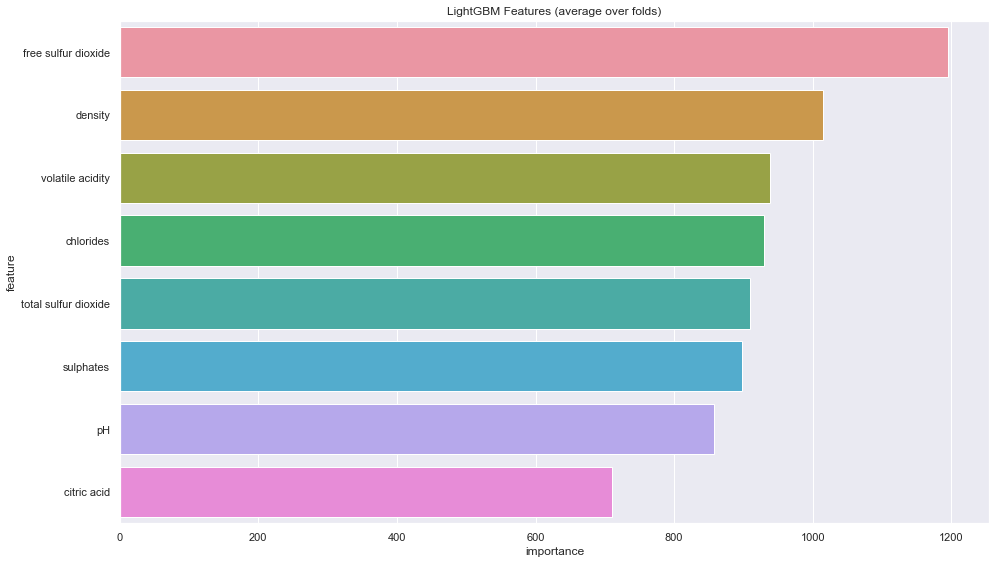

In [65]:
import seaborn as sns
cols = (fidata[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[3:11].index)

best_features = fidata.loc[fidata.feature.isin(cols)]

plt.figure(figsize=(14, 8))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (average over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

#### --Red--

In [66]:
train, test = train_test_split(wine_red_cleaned, test_size = 0.2, random_state = 42, shuffle = False)
X = train.drop(['quality'],axis = 1) #The Physicochemical Variables
X = train.drop(['type'],axis = 1) #The Physicochemical Variables

y = train['quality']  #Target 
pv = [c for c in X.columns]  #The Physicochemical Variables
fidata = pd.DataFrame()  #create a data frame to store the physicochemical varialbles and it's feature_importance
predictions = np.zeros(len(test))
start = time.time()
oof = np.zeros(len(X))

In [67]:
# Define the Stratified K-Fold cross-validator with 5 folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Set the the hyperparameters of the LightGBM model
param = {'num_leavs' : 111,
         'min_data_in_leaf' : 149,
         'objective' : 'regression',
         'max_depth' : 9,
         'learning_rate' : 0.005,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse',
         'lambda_l1' : 0.2634,
         'random_state' : 133,
         'verbosity' : -1
        }
#Iterate through each folds
for kfold, (trn_idx, val_idx) in enumerate(kfold.split(X.values, y.values)):
    print("fold n°{}".format(kfold))
    trn_data = lgb.Dataset(X.iloc[trn_idx][pv],label=y.iloc[trn_idx])#split train data
    val_data = lgb.Dataset(X.iloc[val_idx][pv],label=y.iloc[val_idx])#split validation data
    num_round = 10000
    clf = lgb.train(param,trn_data,num_round,valid_sets = [trn_data, val_data],verbose_eval=100,early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(X.iloc[val_idx][pv], num_iteration=clf.best_iteration)
    
    fidata = pd.DataFrame()
    fidata["feature"] = pv
    fidata["importance"] = clf.feature_importance()
    fidata["fold"] = kfold + 1
    
    predictions += clf.predict(test[pv], num_iteration=clf.best_iteration) / 5

print("CV score: {:<8.5f}".format(mean_squared_error(oof, y)**0.5))

/Users/leaf/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


fold n°0
[LightGBM] [Warning] Unknown parameter: num_leavs
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 200 rounds
[100]	training's rmse: 0.563334	valid_1's rmse: 0.574844
[200]	training's rmse: 0.45157	valid_1's rmse: 0.468495
[300]	training's rmse: 0.400771	valid_1's rmse: 0.422851
[400]	training's rmse: 0.377919	valid_1's rmse: 0.4037
[500]	training's rmse: 0.36738	valid_1's rmse: 0.39568
[600]	training's rmse: 0.361518	valid_1's rmse: 0.393077
[700]	training's rmse: 0.357711	valid_1's rmse: 0.3918
[800]	training's rmse: 0.354872	valid_1's rmse: 0.390801
[900]	training's rmse: 0.35257	valid_1's rmse: 0.390286
[1000]	training's rmse: 0.350733	valid_1's rmse: 0.389662
[1100]	training's rmse: 0.349086	valid_1's rmse: 0.389057
[1200]	training's rmse: 0.347591	valid_1's rmse: 0.388452
[1300]	training's rmse: 0.346252	valid_1's rmse: 0.387984
[1400]	train

[1400]	training's rmse: 0.354885	valid_1's rmse: 0.353301
[1500]	training's rmse: 0.353691	valid_1's rmse: 0.35281
[1600]	training's rmse: 0.352605	valid_1's rmse: 0.352259
[1700]	training's rmse: 0.351596	valid_1's rmse: 0.351867
[1800]	training's rmse: 0.350648	valid_1's rmse: 0.351457
[1900]	training's rmse: 0.349691	valid_1's rmse: 0.351051
[2000]	training's rmse: 0.348726	valid_1's rmse: 0.350726
[2100]	training's rmse: 0.347855	valid_1's rmse: 0.350477
[2200]	training's rmse: 0.34702	valid_1's rmse: 0.350254
[2300]	training's rmse: 0.346198	valid_1's rmse: 0.349953
[2400]	training's rmse: 0.345343	valid_1's rmse: 0.349569
[2500]	training's rmse: 0.34456	valid_1's rmse: 0.349448
[2600]	training's rmse: 0.343855	valid_1's rmse: 0.349259
[2700]	training's rmse: 0.343129	valid_1's rmse: 0.348867
[2800]	training's rmse: 0.342389	valid_1's rmse: 0.348546
[2900]	training's rmse: 0.341717	valid_1's rmse: 0.348422
[3000]	training's rmse: 0.341057	valid_1's rmse: 0.348132
[3100]	training's

In [68]:
print("Root Mean Squared Error (RMSE) 	: {}".format(mean_squared_error(predictions, test['quality'])**0.5))

Root Mean Squared Error (RMSE) 	: 0.3930324743088398


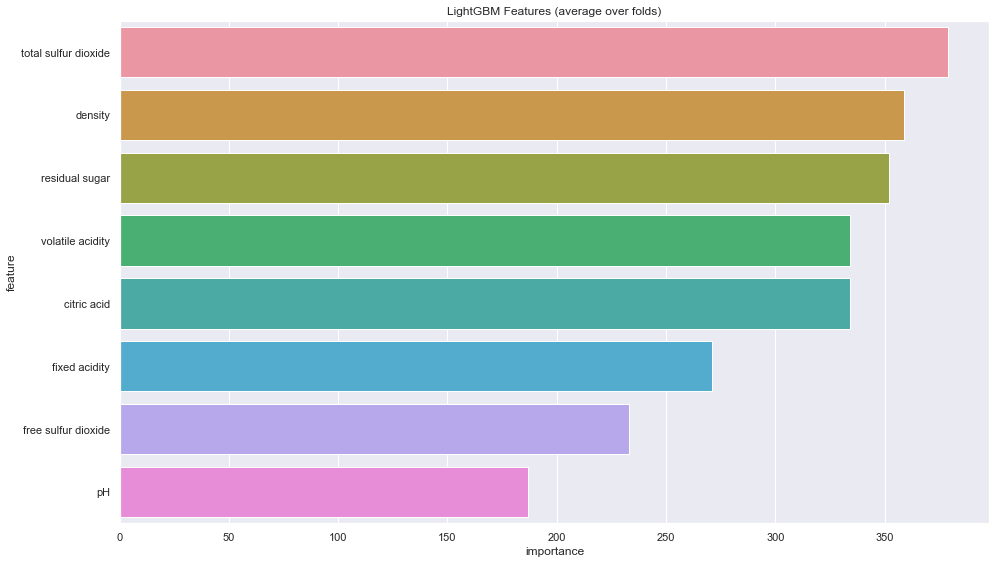

In [69]:
cols = (fidata[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[3:11].index)

best_features = fidata.loc[fidata.feature.isin(cols)]

plt.figure(figsize=(14, 8))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (average over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')